## hierarchical clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=(250)  
sns.set_style('darkgrid')

In [112]:
df=pd.read_csv('crime_data.csv')

In [113]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [114]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


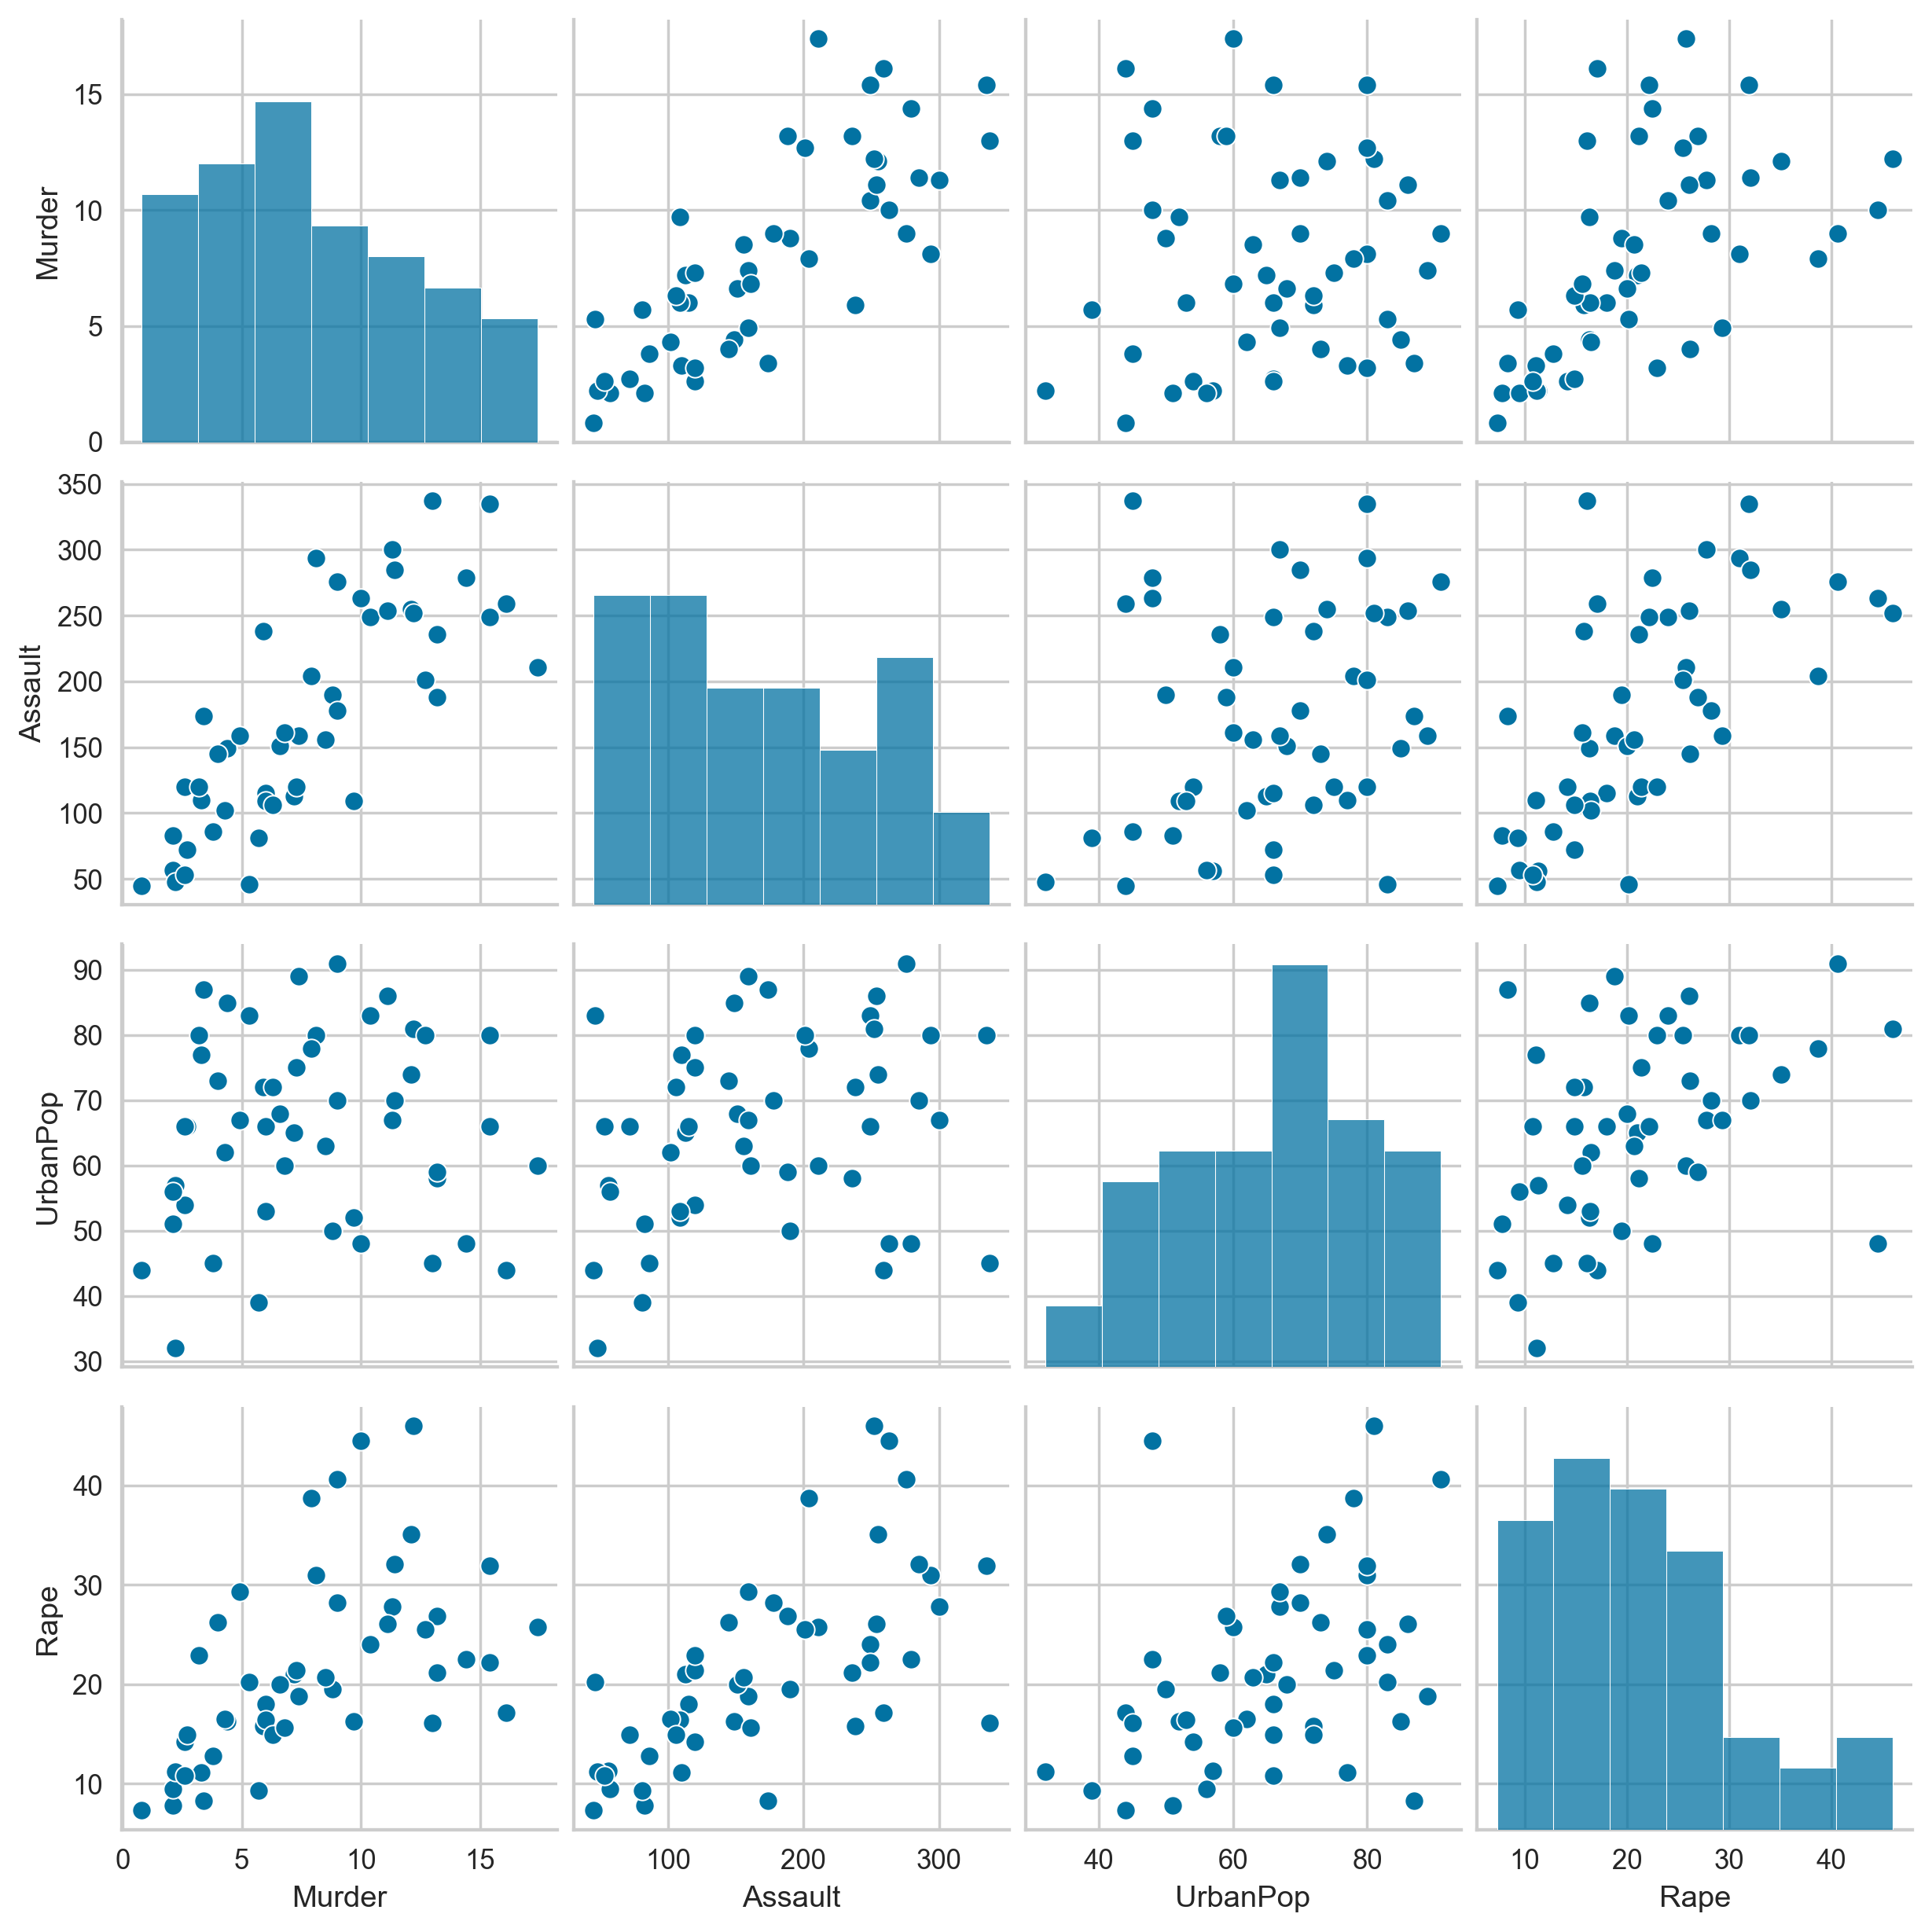

In [75]:
sns.pairplot(df)

In [ ]:
# INFERENCE
   From pairplot we infer that murder and assault columns are highly correlated to each other,murder and rape also correlated
    to each other , and the pairplot between columns only shows that there is only one cluster.

In [115]:
x= df.drop(columns=['Unnamed: 0'])
x


,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [7]:
## freature scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [116]:
x = sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
# INFERENCE
 feature scaling convert all the data in a standardise form ,in feature scaling we are using Standardscalar,so mean= 0 and std =1.

In [11]:
from scipy.cluster import hierarchy

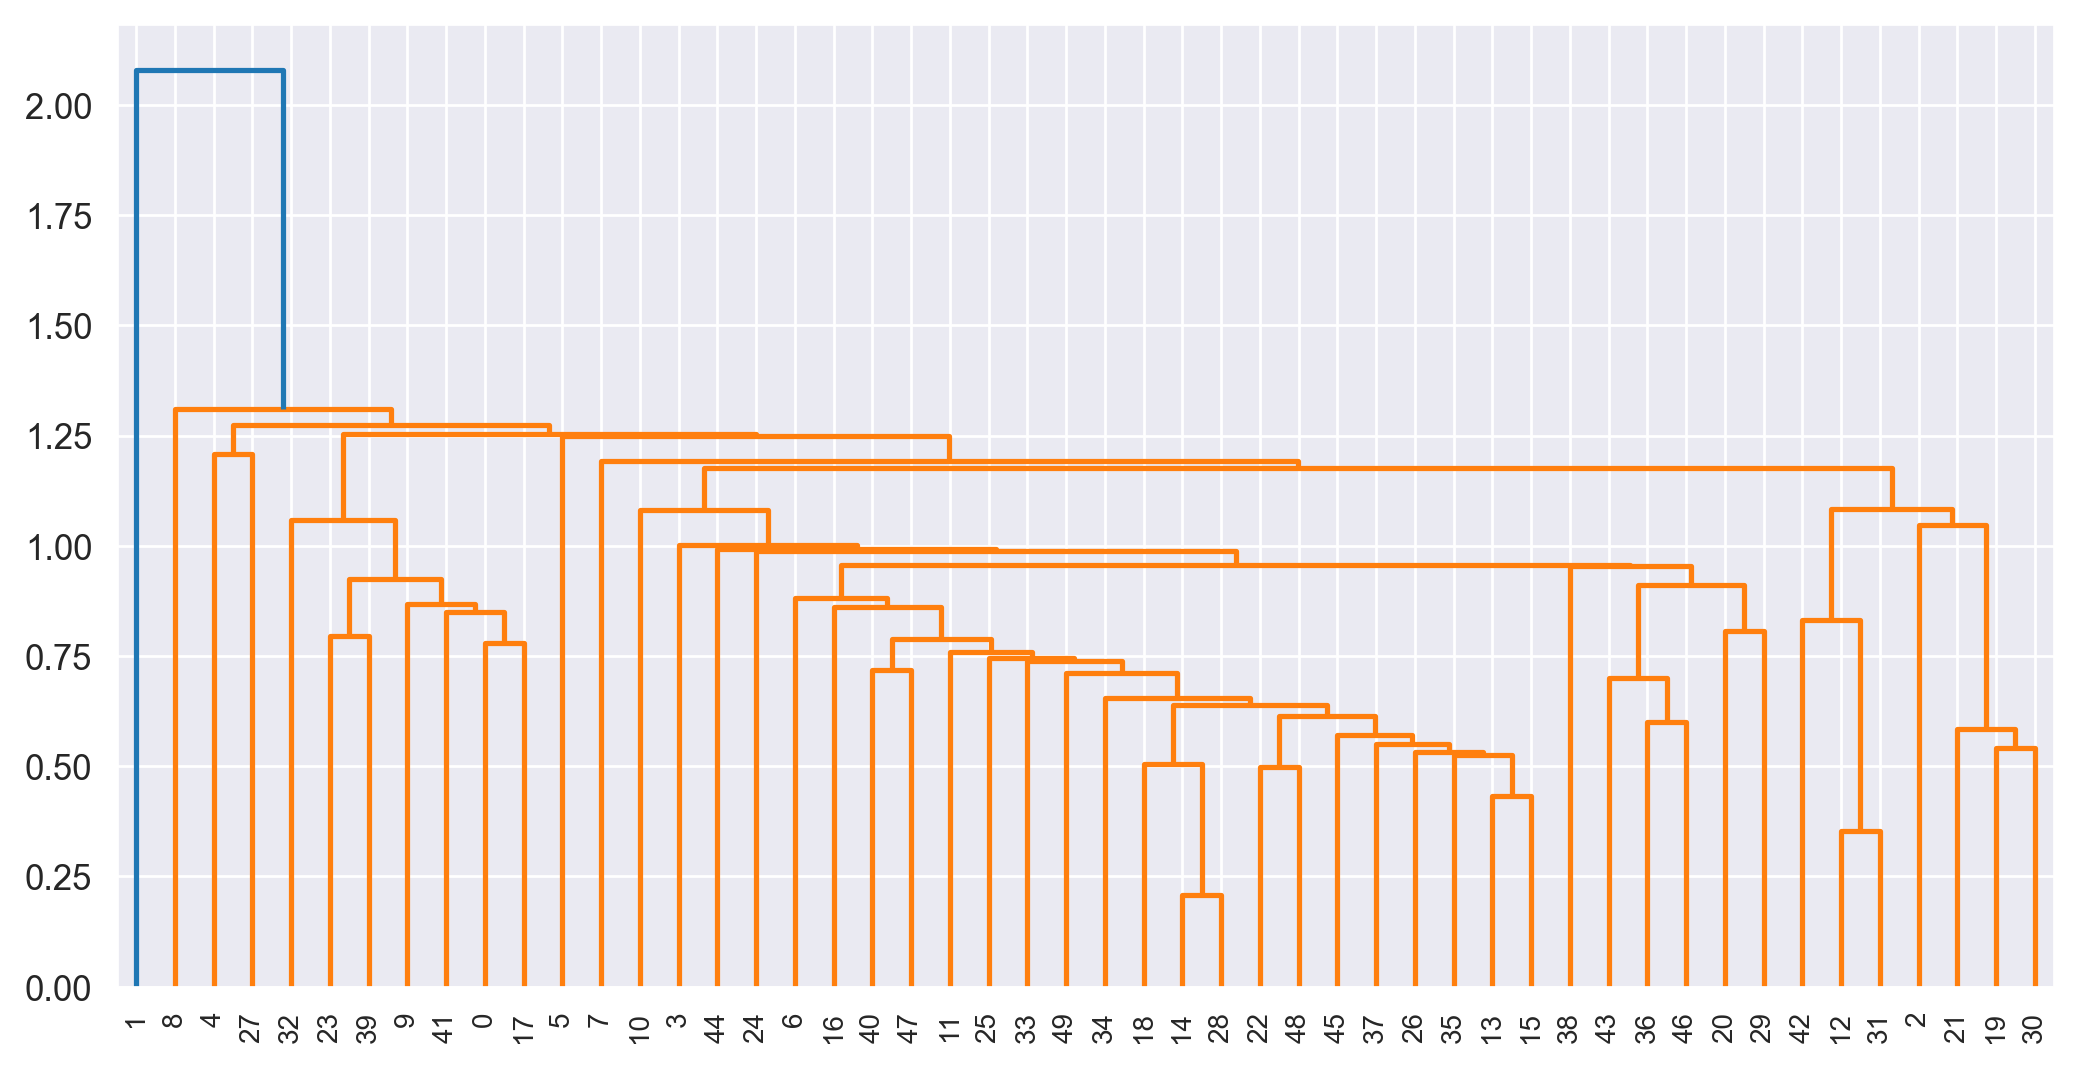

In [12]:
lk = hierarchy.linkage(x,method='single')
dendrogram = hierarchy.dendrogram(lk)

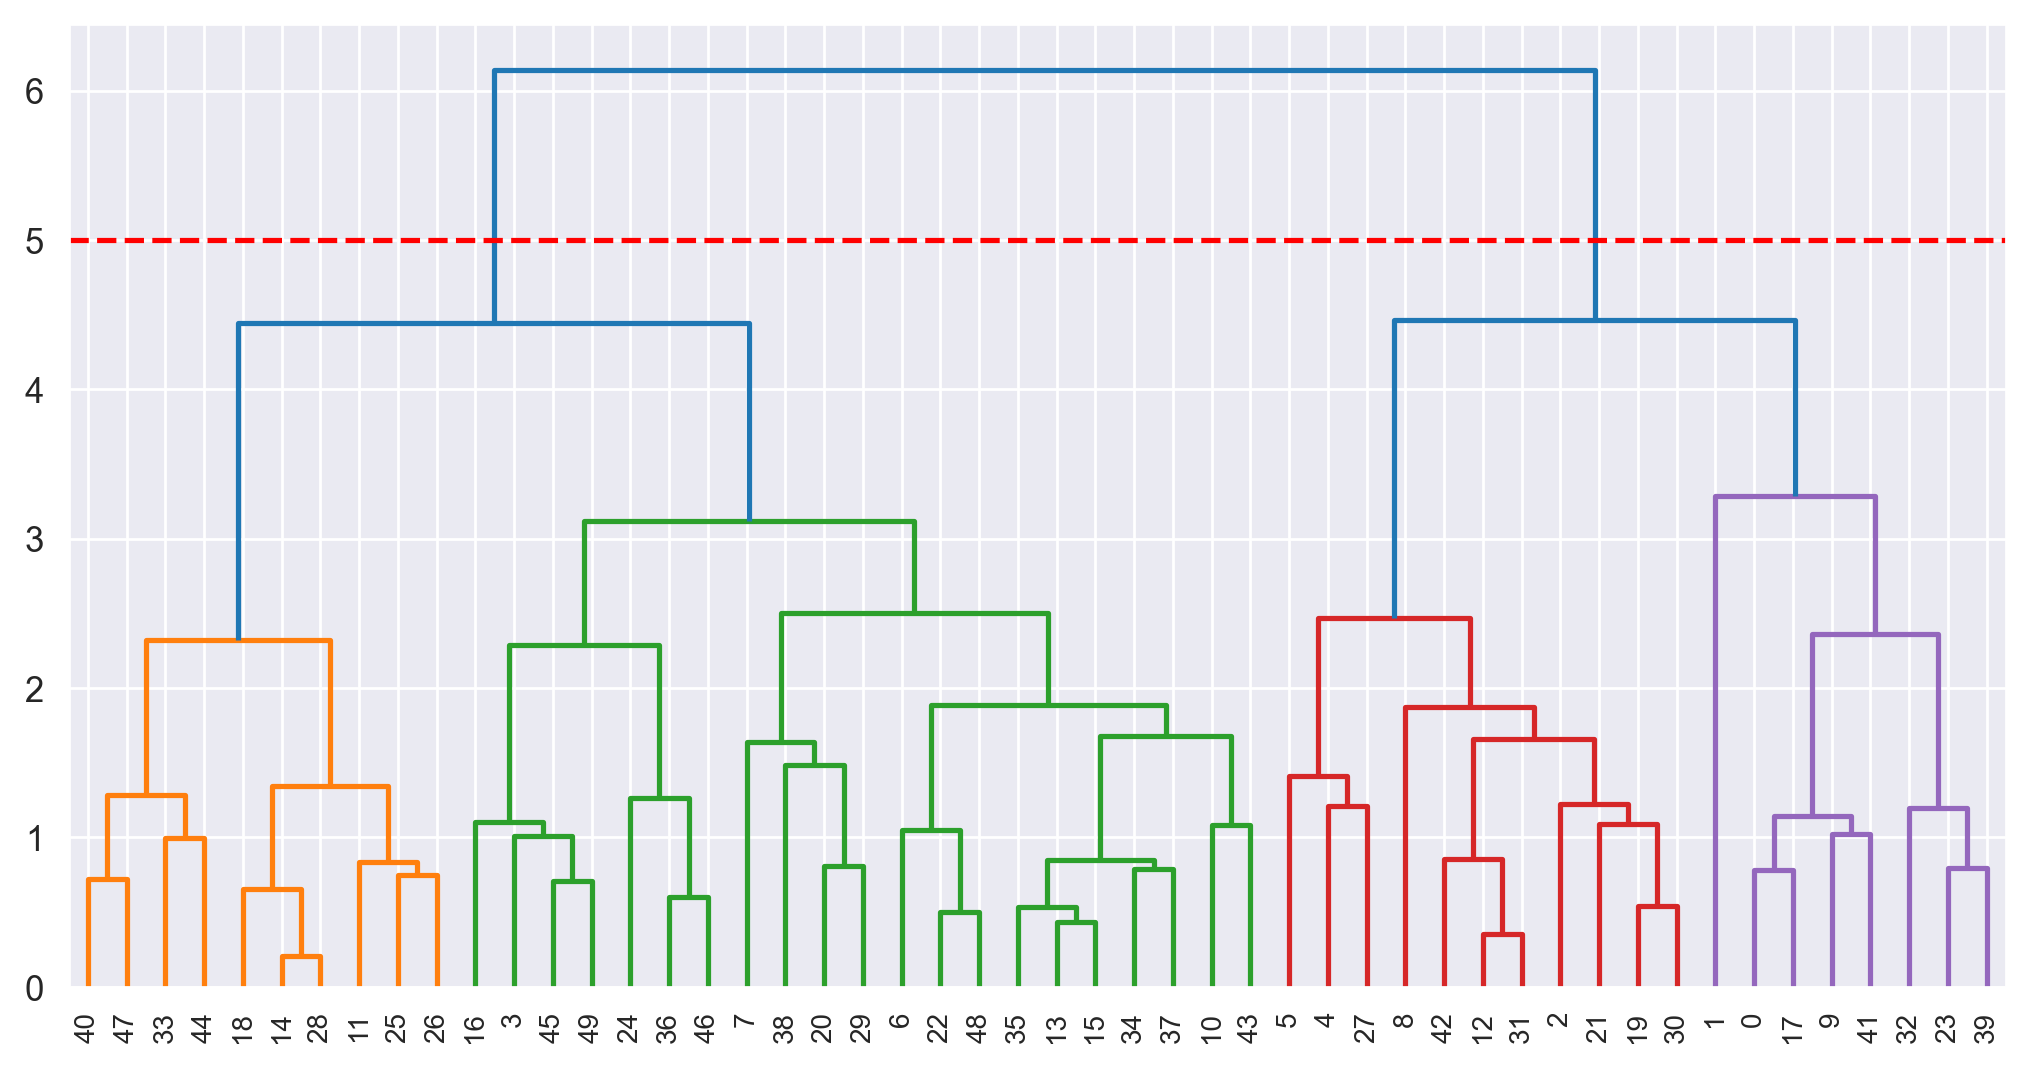

In [13]:
lk = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y=5, c= 'red', linestyle ='--')

In [14]:
# model building 

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [84]:
hc = AgglomerativeClustering()

In [85]:
y = hc.fit_predict(x)
y

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [86]:
df['cluster']=y

In [87]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [88]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


In [ ]:
# Inference
  In model building we are using ,we predicted that there is only two cluster,and by using groupby function we conclude that how
    form a group.

<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

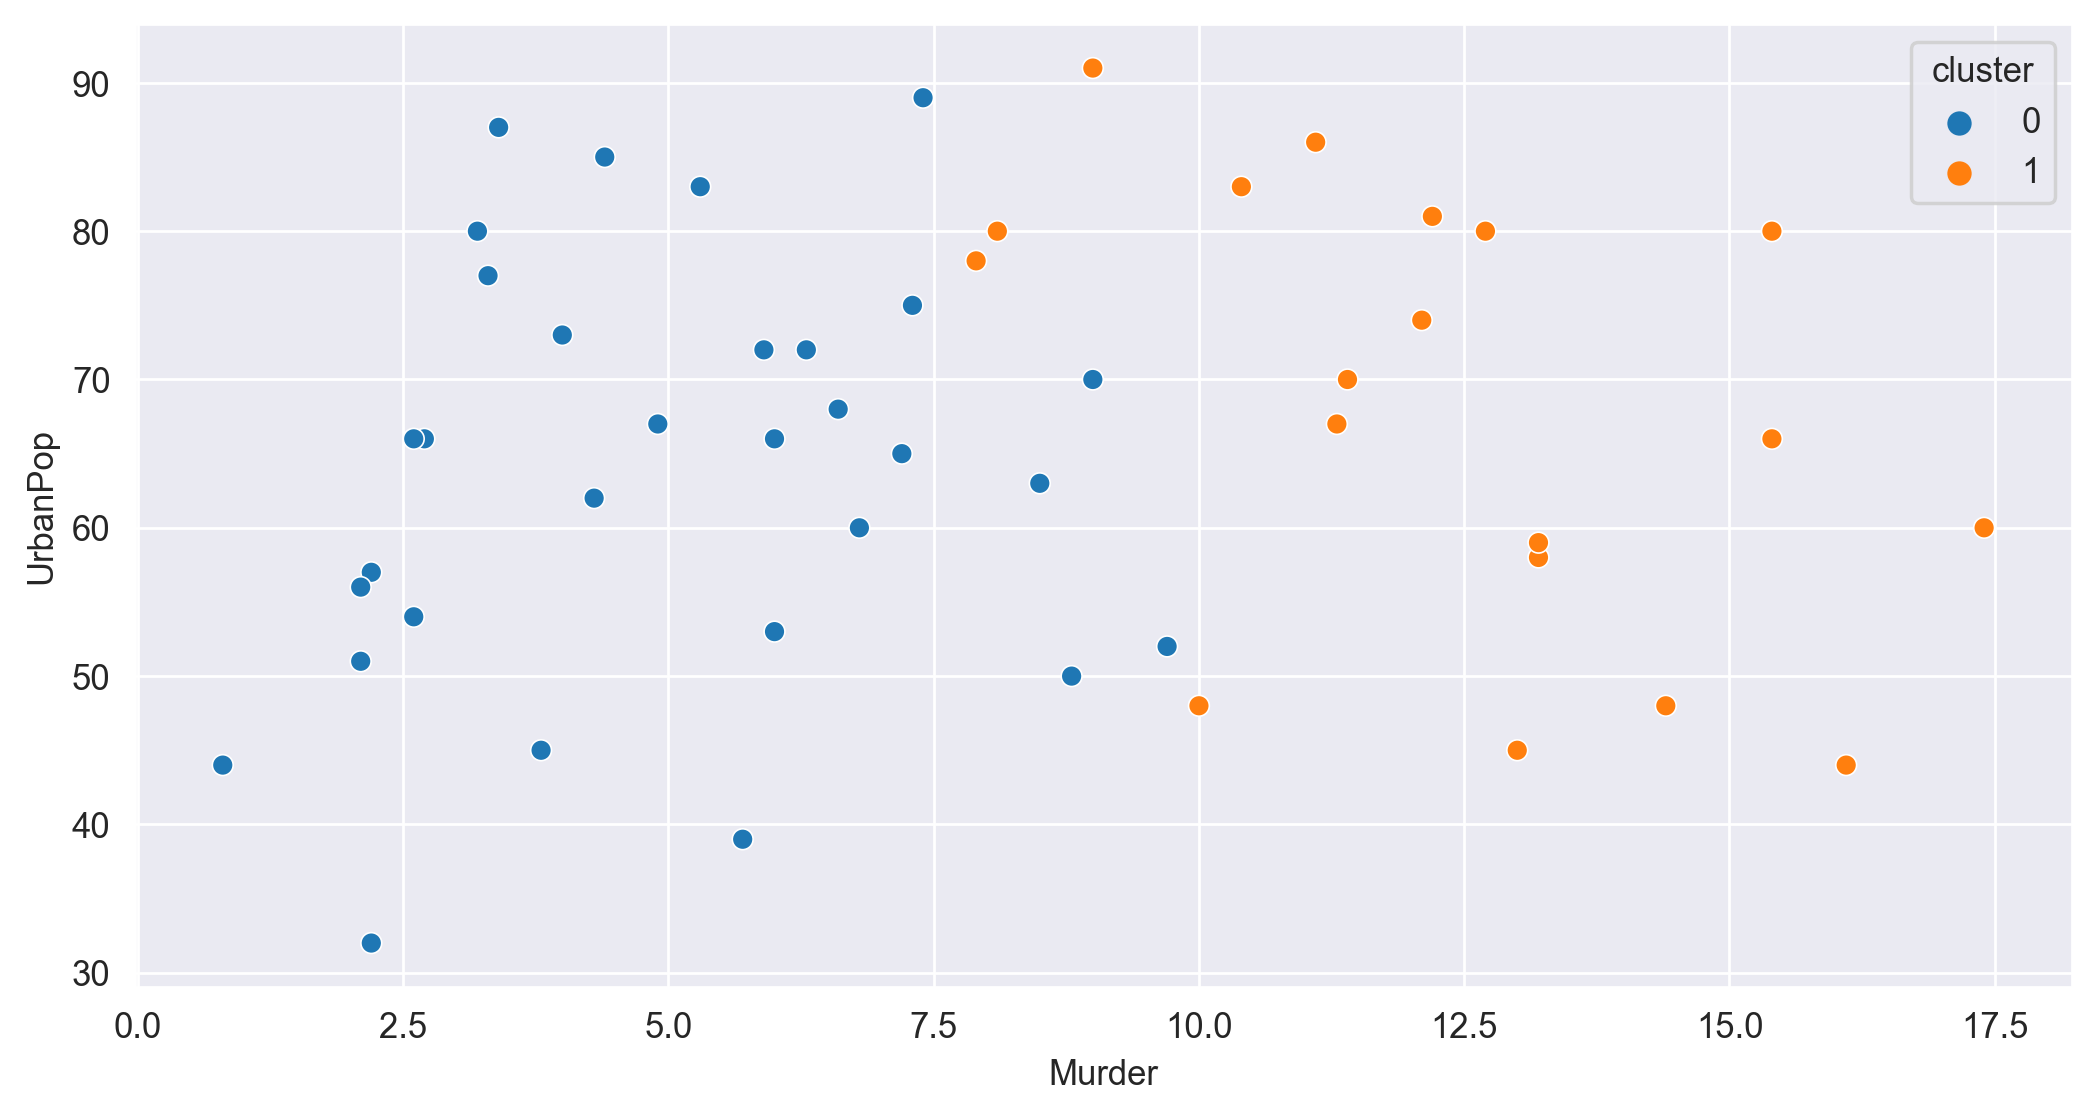

In [21]:
sns.scatterplot(df['Murder'],df['UrbanPop'],hue= df['cluster'])

In [22]:
df[df['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0


In [23]:
# cluster

In [24]:
data = pd.DataFrame(x)
data

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


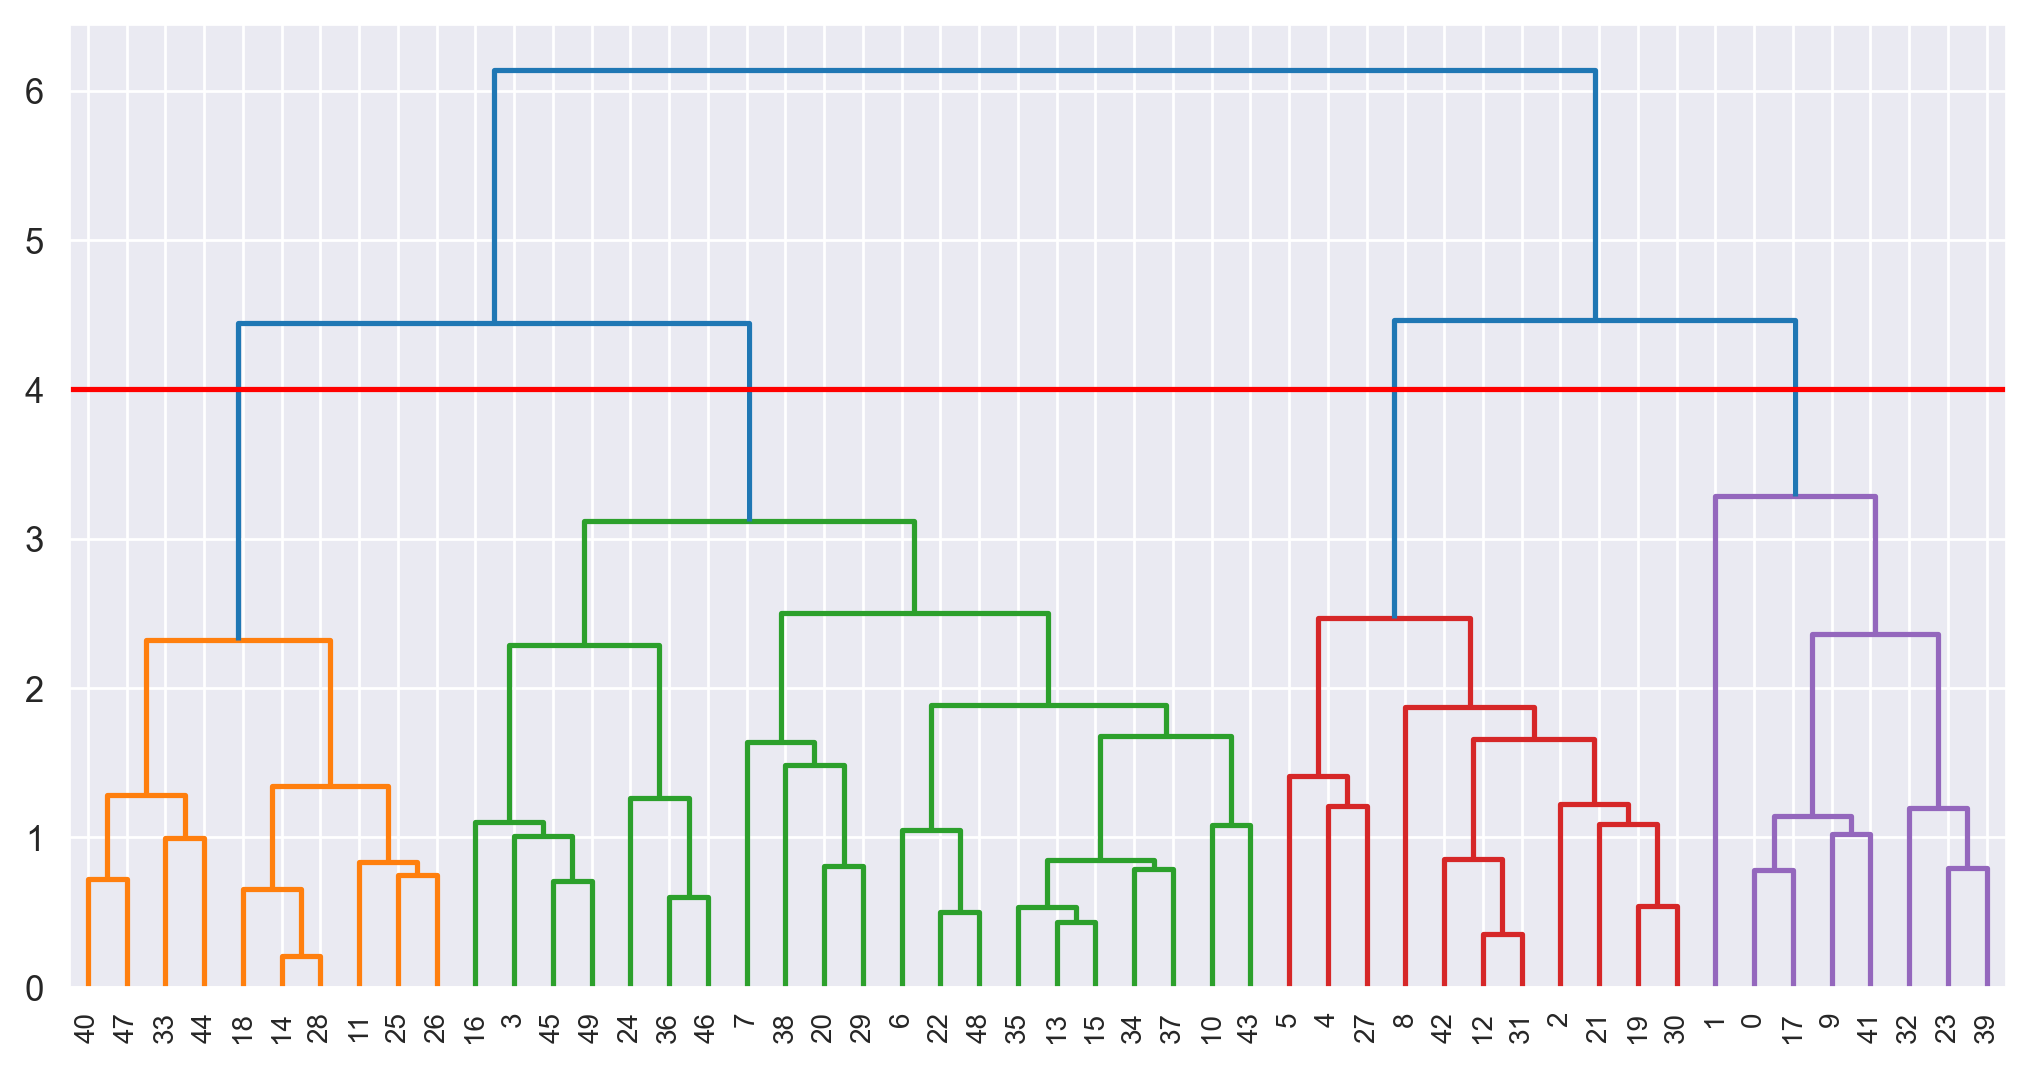

In [25]:
k = hierarchy.linkage(x,method='complete')
dendrogram = hierarchy.dendrogram(k)
plt.axhline(y=4, c='red',linestyle='-')


In [26]:
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(data)
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [27]:
df['y']=y

In [28]:
df.groupby('y').agg('mean')

,Murder,Assault,UrbanPop,Rape,cluster
y,,,,,
0,6.210526,142.052632,71.263158,19.184211,0.0
1,10.966667,264.000000,76.500000,33.608333,1.0
2,3.091667,76.000000,52.083333,11.833333,0.0
3,14.671429,251.285714,54.285714,21.685714,1.0


<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

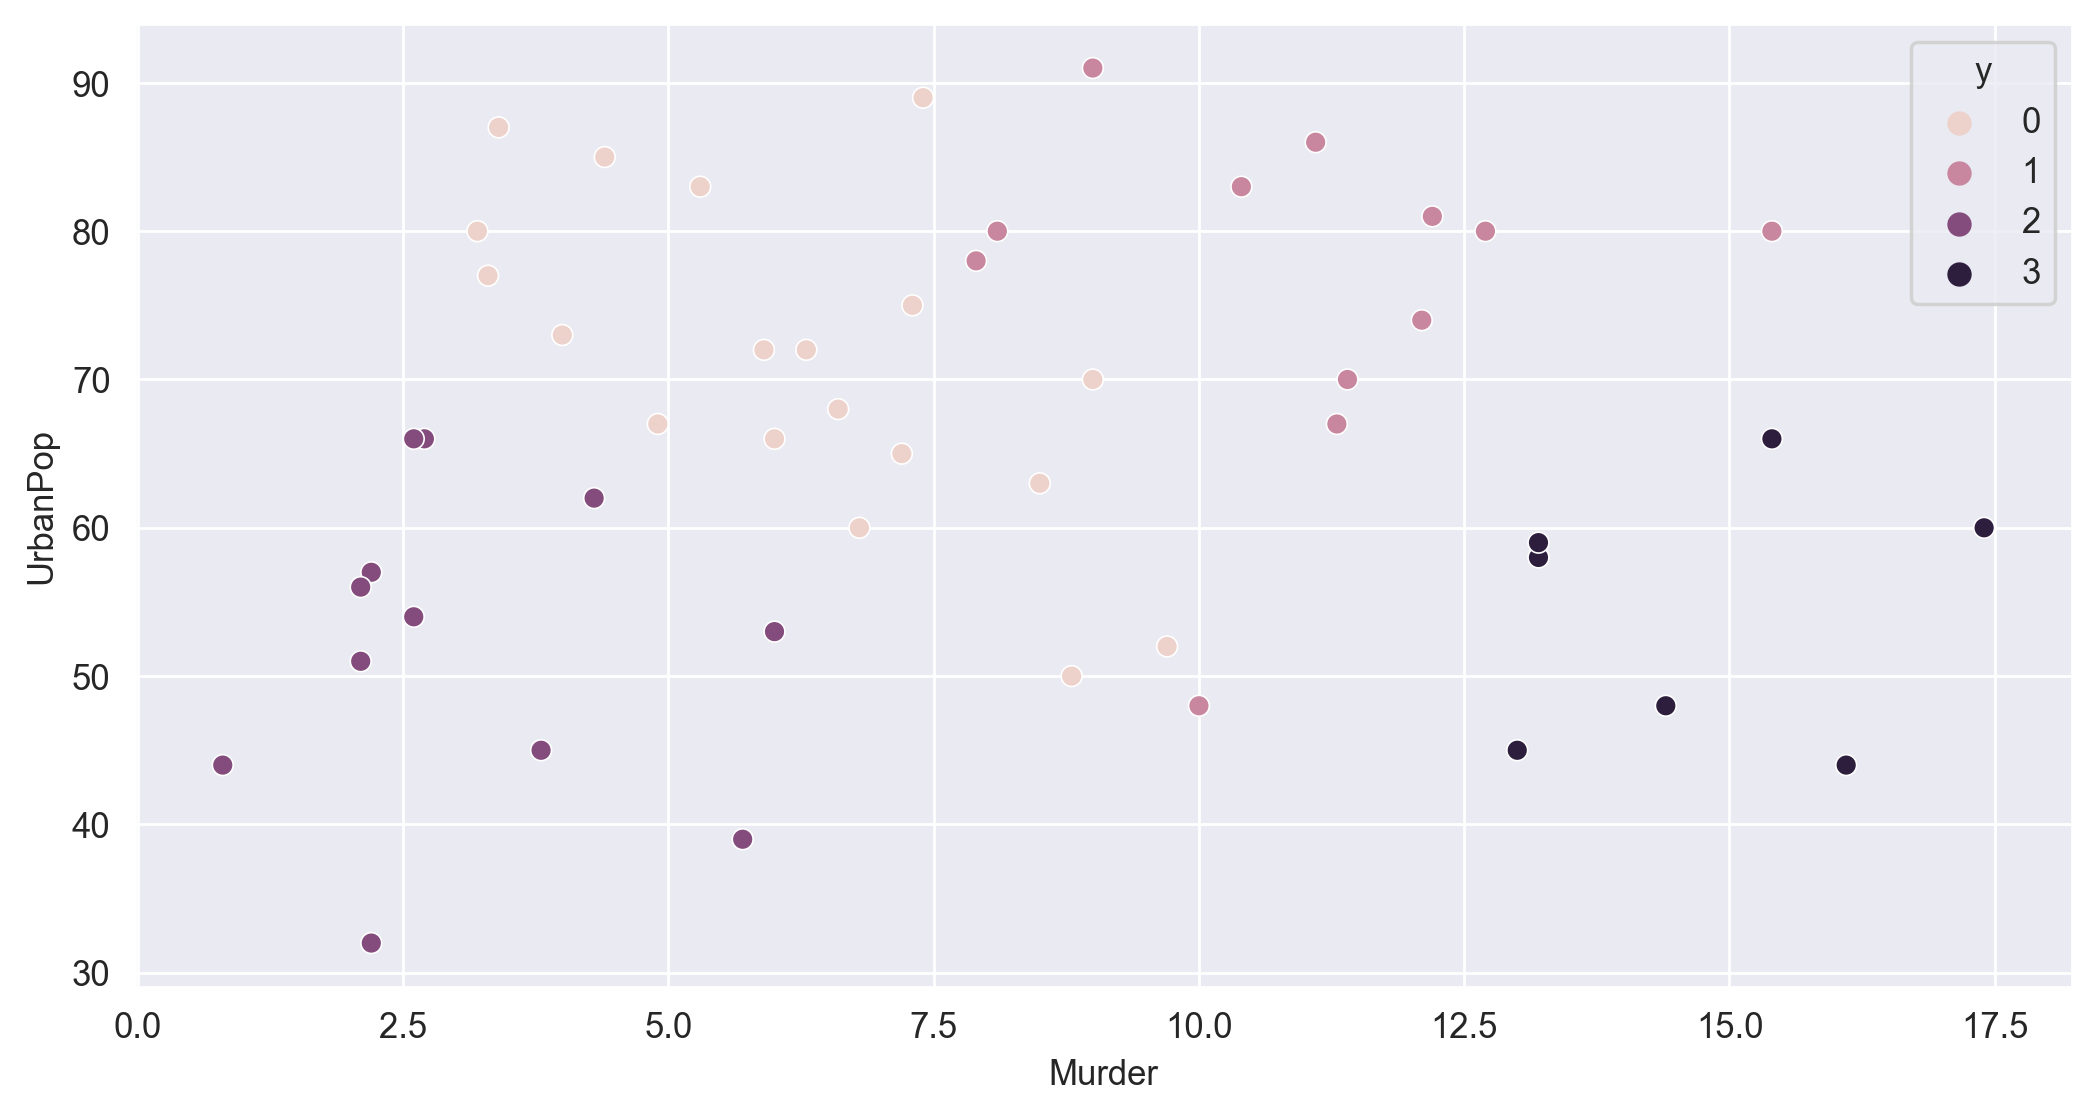

In [29]:
sns.scatterplot(df['Murder'],df['UrbanPop'],hue=df['y'])

## K-mean Clustering

In [30]:
df1 = pd.read_csv("crime_data.csv")

In [31]:
x1=df1.drop(columns='Unnamed: 0')
x1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [32]:
df1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [96]:
x = sc.fit_transform(x1)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## model buliding

In [35]:
from sklearn.cluster import KMeans

In [97]:
km = KMeans()
y = km.fit_predict(x1)
y

array([0, 6, 7, 4, 7, 4, 3, 0, 5, 4, 1, 3, 0, 3, 1, 3, 3, 0, 1, 7, 2, 0,
       1, 6, 4, 3, 3, 0, 1, 2, 7, 0, 5, 1, 3, 2, 2, 3, 2, 6, 1, 4, 4, 3,
       1, 2, 2, 1, 1, 2])

In [91]:
km.cluster_centers_

array([[ 11.82222222, 250.55555556,  68.        ,  28.        ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  2.55714286,  53.85714286,  57.71428571,  12.17142857],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333],
       [ 10.84      , 286.8       ,  71.2       ,  30.8       ],
       [ 14.2       , 336.        ,  62.5       ,  24.        ],
       [  3.86666667,  83.33333333,  45.        ,   9.96666667],
       [  5.75      , 156.75      ,  74.        ,  19.4       ]])

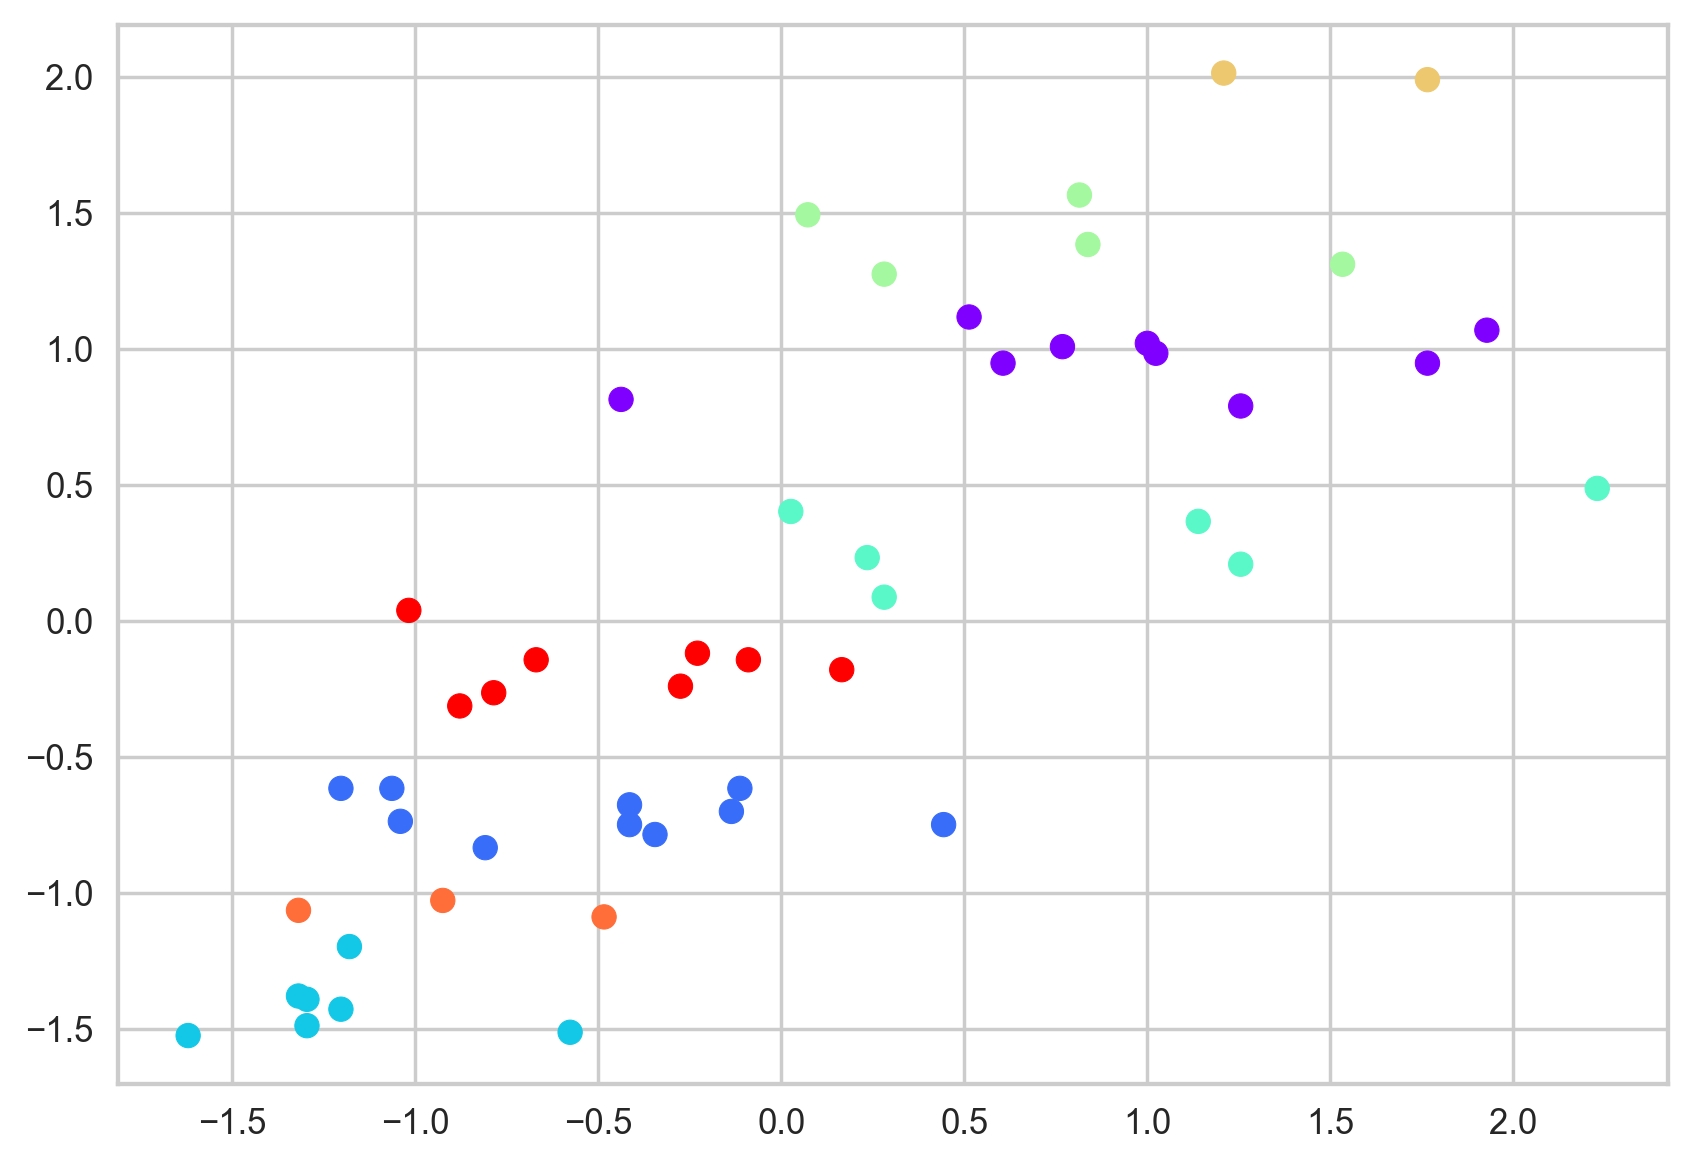

In [92]:
plt.scatter(x[:,0],x[:,1],c = y, cmap='rainbow')

In [ ]:
# Inference
by using k-means clustering we infer that there is 8 cluster in the data.

In [39]:
from sklearn.metrics import silhouette_score

In [98]:
 silhouette_score(x,y)

0.01581965470404786

In [ ]:
# inference 
Using silhouette_score we calculate the accuracy of model.

## Elbow Graph

In [ ]:
# inference
  elbow graph is higly used to calculate cluster in the data. 

In [41]:
wcss=[]


for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [42]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.05119672966492,
 44.347436433806834,
 41.23415102681119,
 35.40625335154438,
 31.997381022324554,
 27.576717242450883,
 24.76613827453574,
 22.73623236286896,
 21.123472967737314,
 19.57029036263605,
 17.46501446654986,
 16.840704499546636,
 15.823277154857097,
 14.805327217801885,
 13.894323632085287]

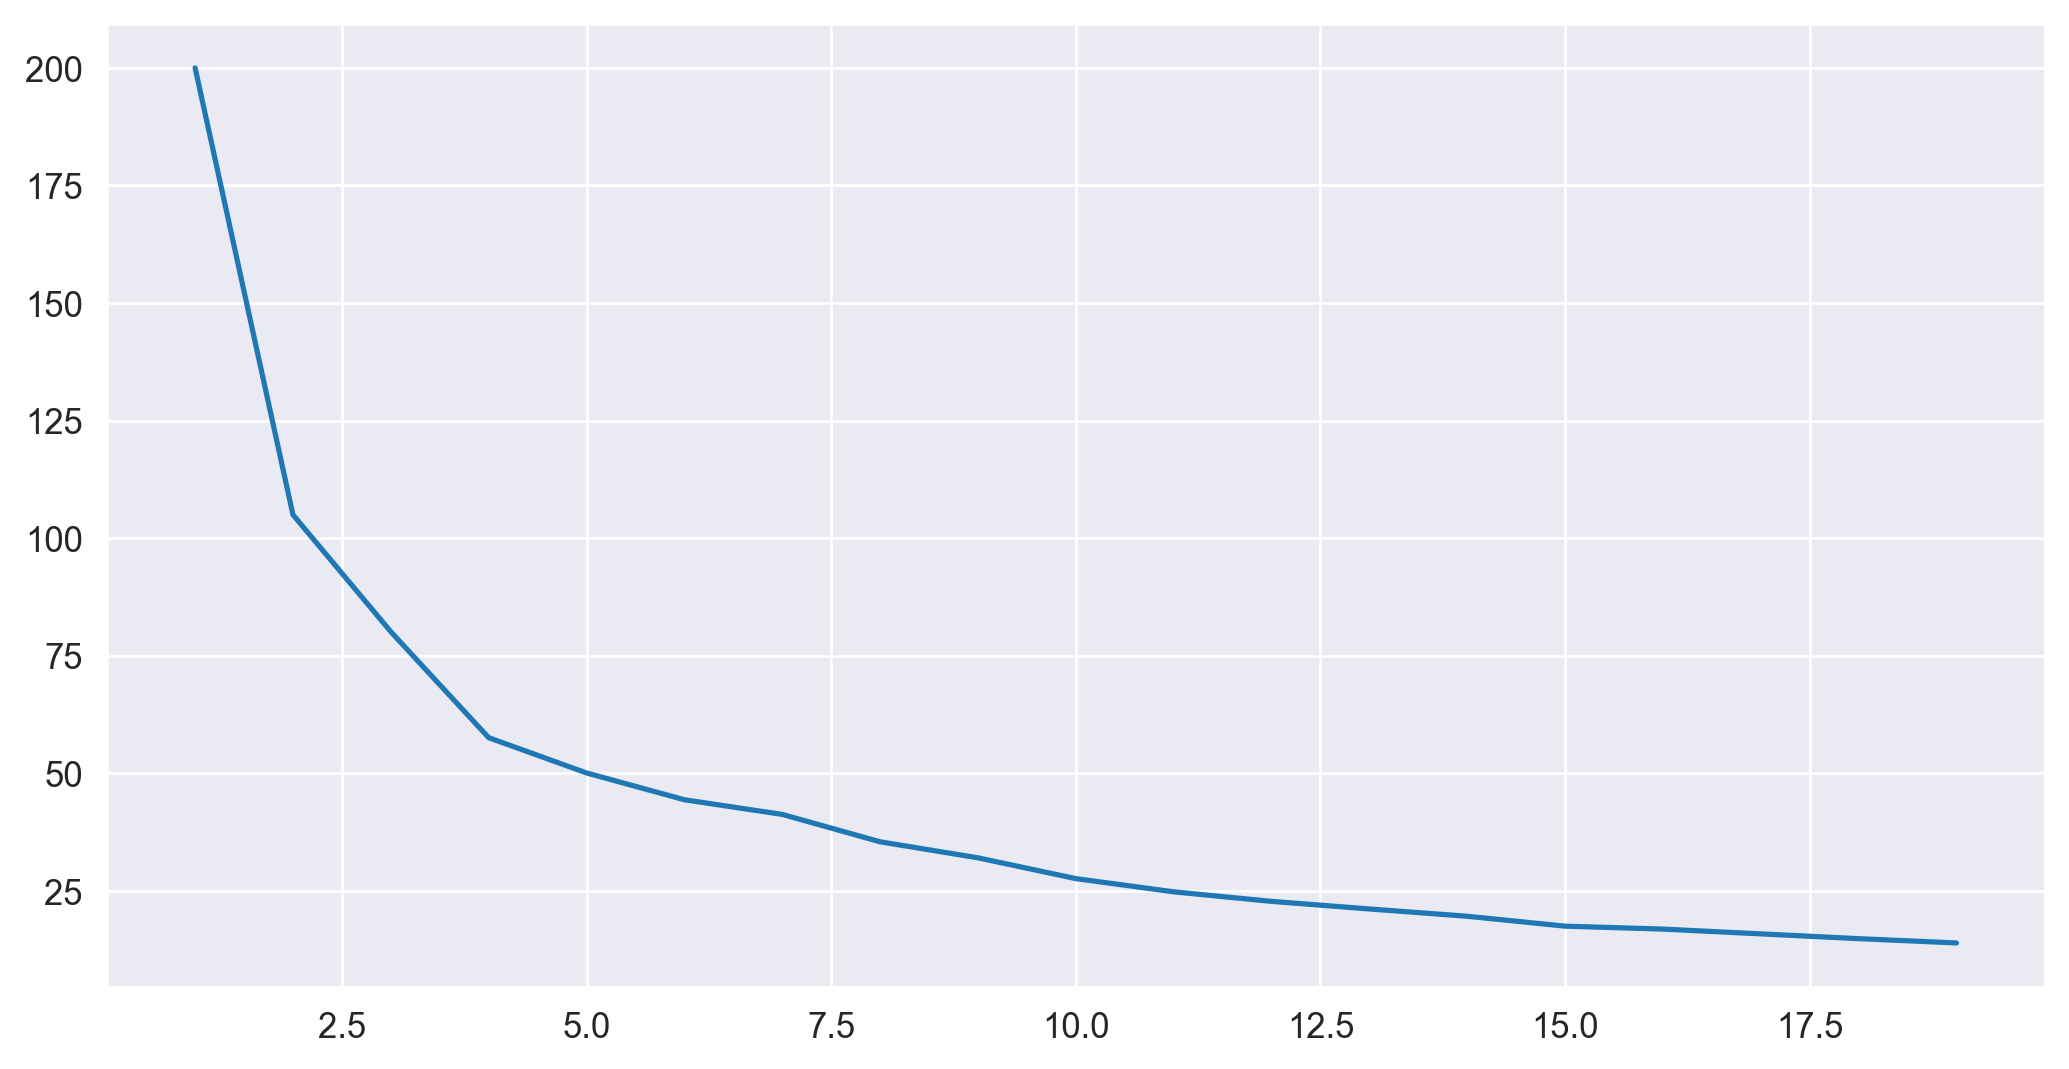

In [43]:
plt.plot(range(1,20),wcss)

In [44]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([4, 1, 1, 0, 1, 1, 2, 2, 1, 4, 2, 3, 1, 0, 3, 0, 0, 4, 3, 1, 2, 1,
       3, 4, 0, 0, 0, 1, 3, 2, 1, 1, 4, 3, 2, 0, 0, 2, 2, 4, 3, 4, 1, 2,
       3, 0, 2, 3, 3, 0])

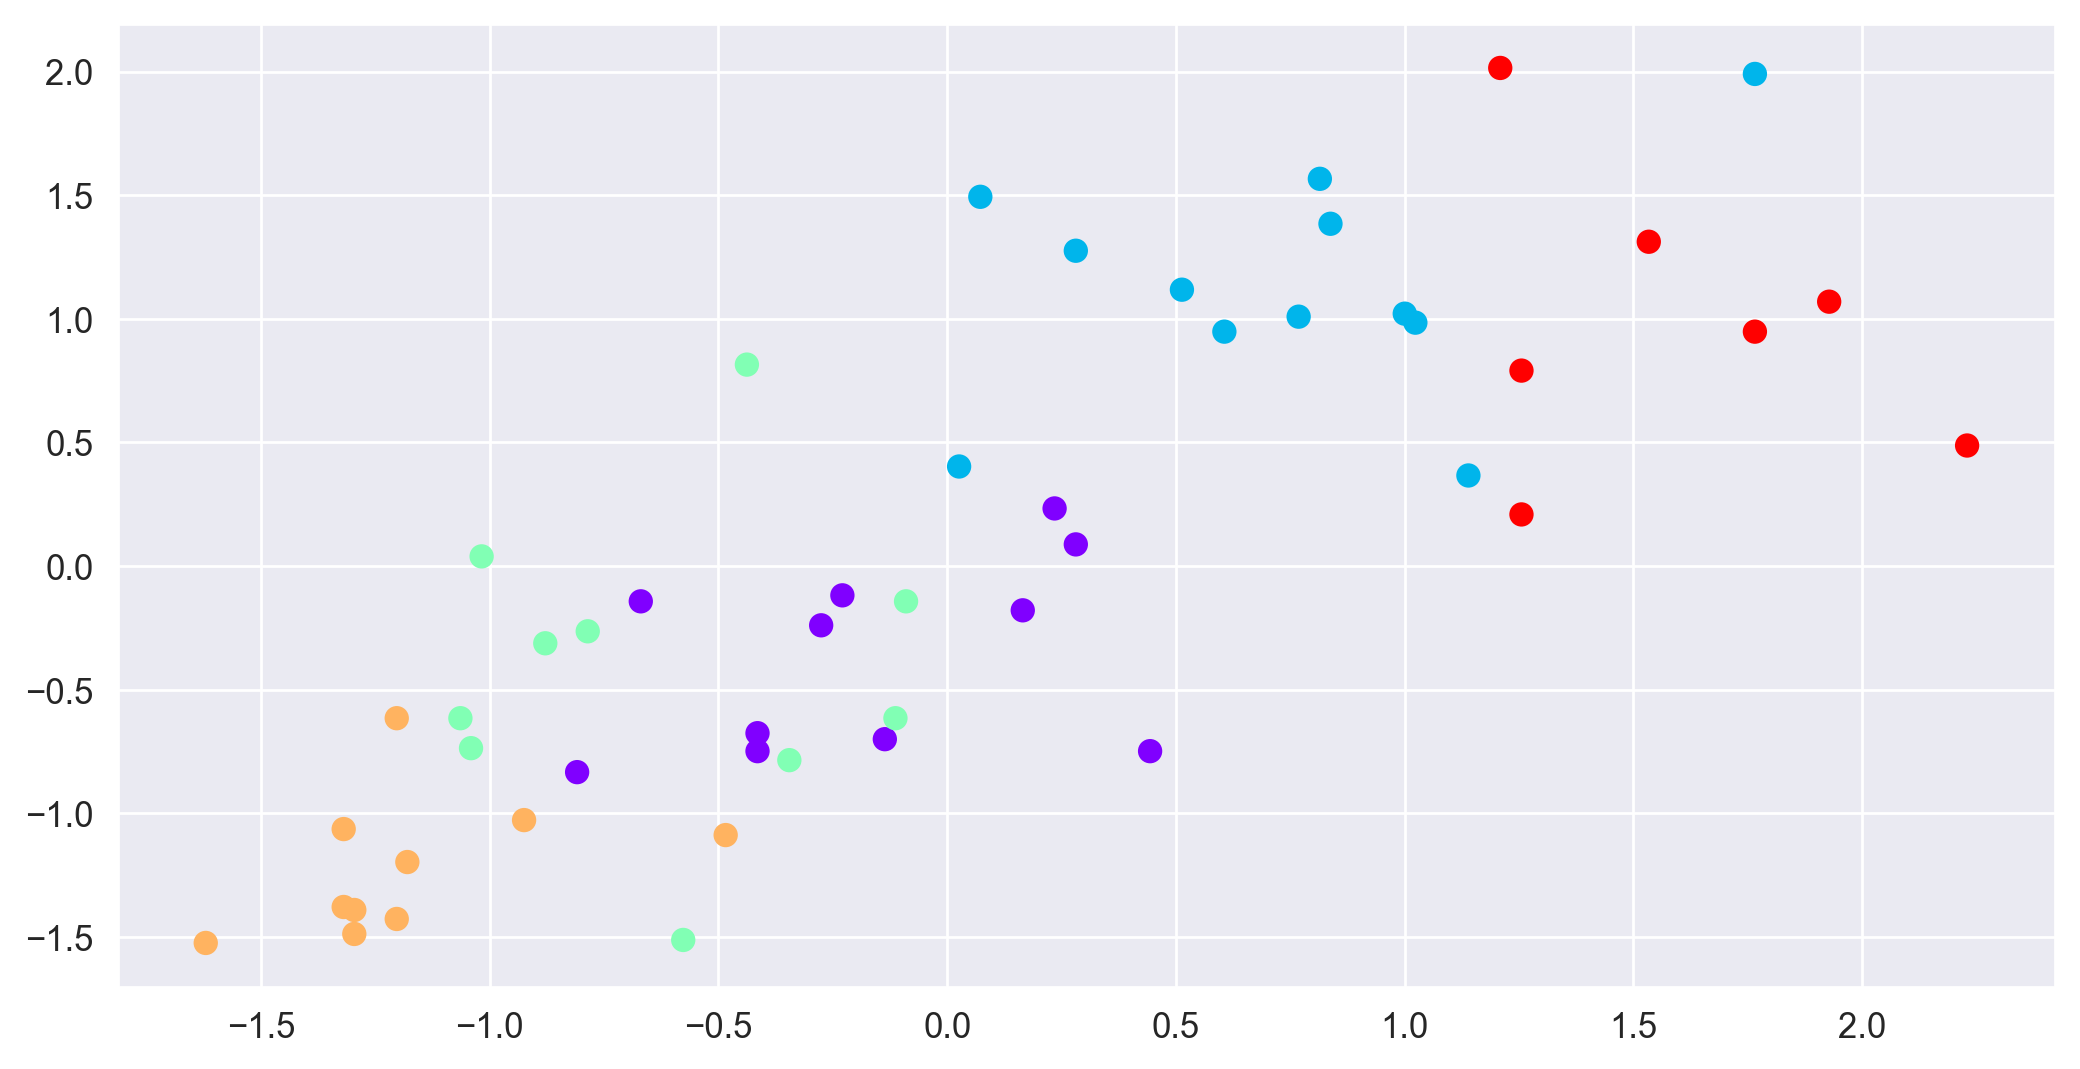

In [45]:
plt.scatter(x[:,0],x[:,1],c = ypred , cmap='rainbow')

In [46]:
km.cluster_centers_

array([[-0.16588978, -0.36954236, -0.28511225, -0.11816297],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.63501124, -0.41284811,  0.96027124, -0.39278502],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ]])

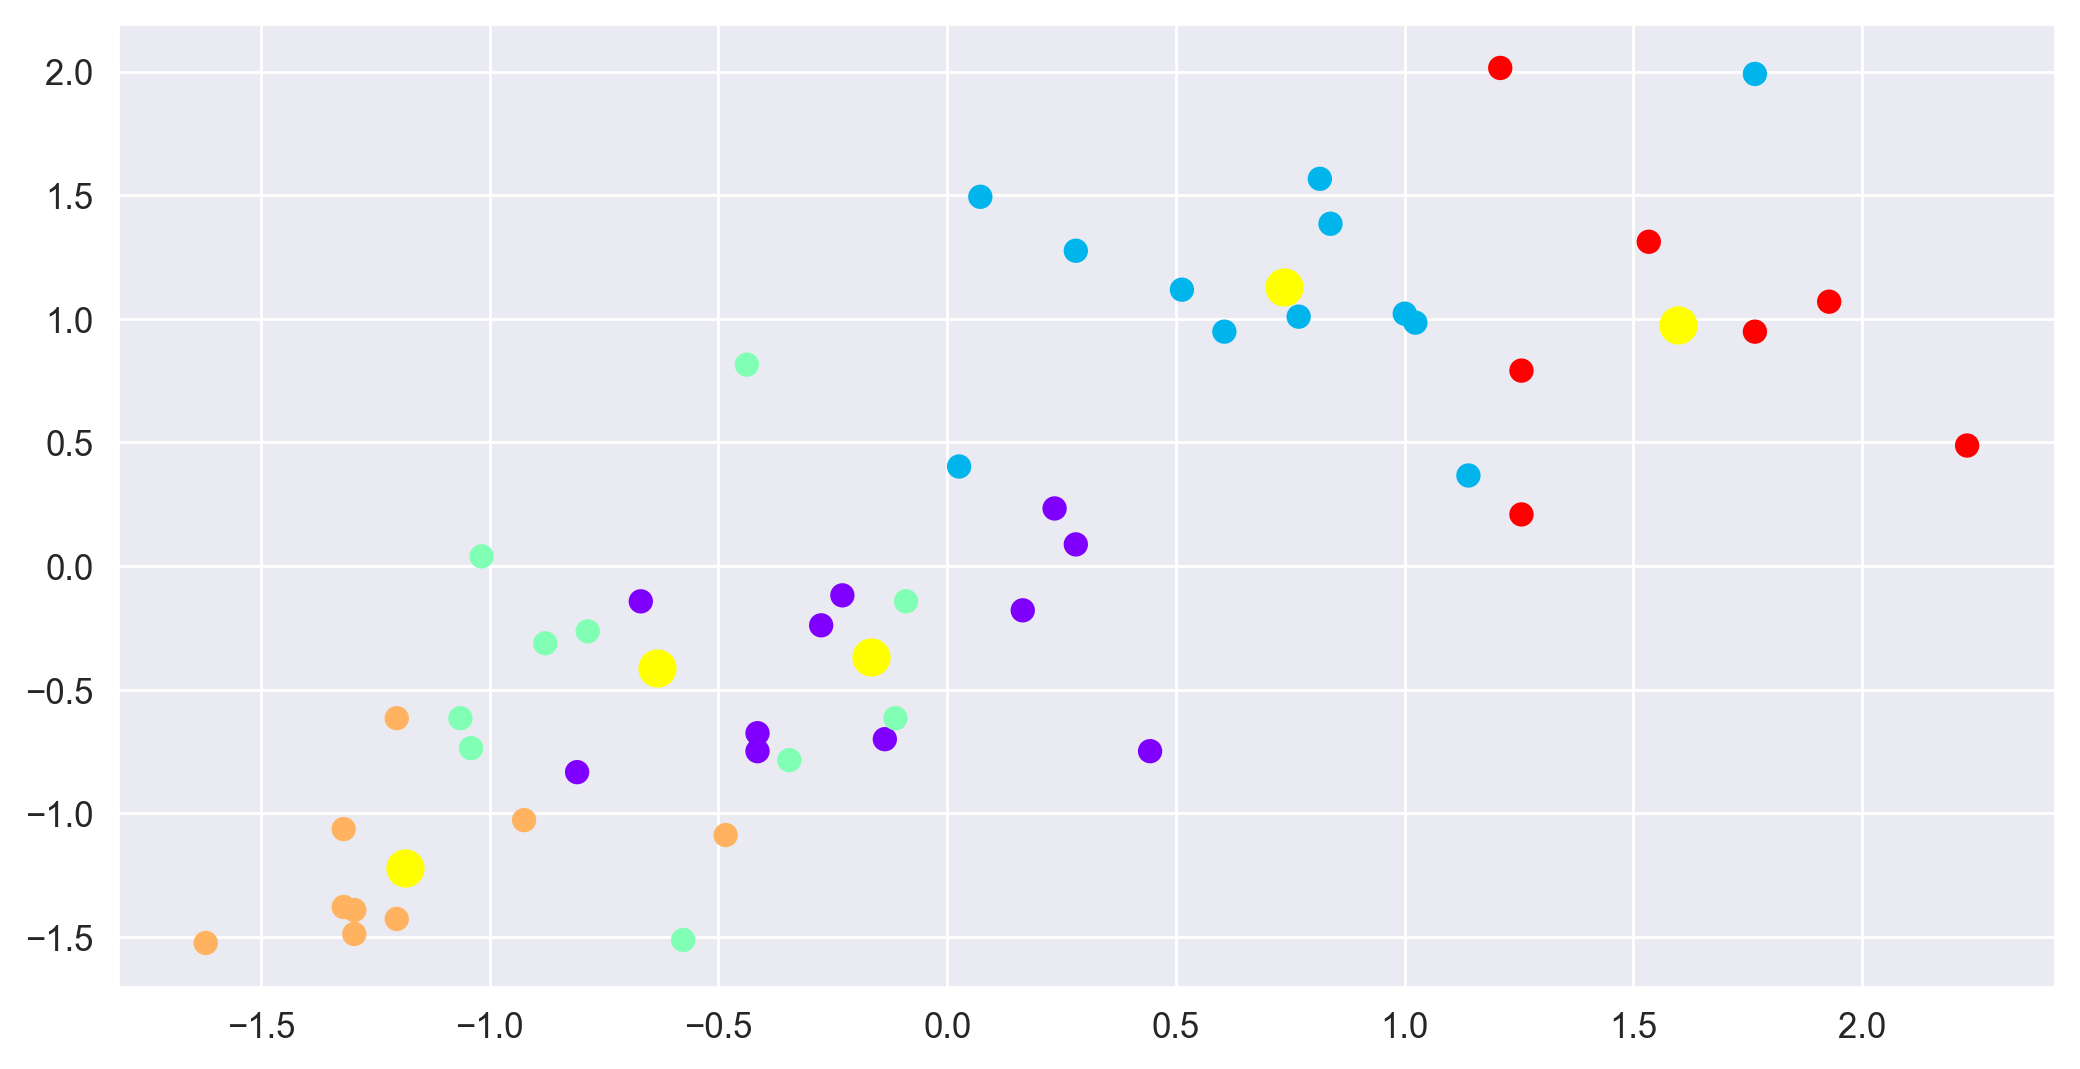

In [47]:
plt.scatter(x[:,0],x[:,1],c = ypred , cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=100)

In [48]:
silhouette_score(x,ypred)

0.3030780707564602

In [ ]:
# inference
this scatterplot shows the cluster with there center,  in k-mean wherever new cluster is added ,the position of the cluster
centered is change.

In [49]:
!pip install yellowbrick

In [50]:
from yellowbrick.cluster import SilhouetteVisualizer

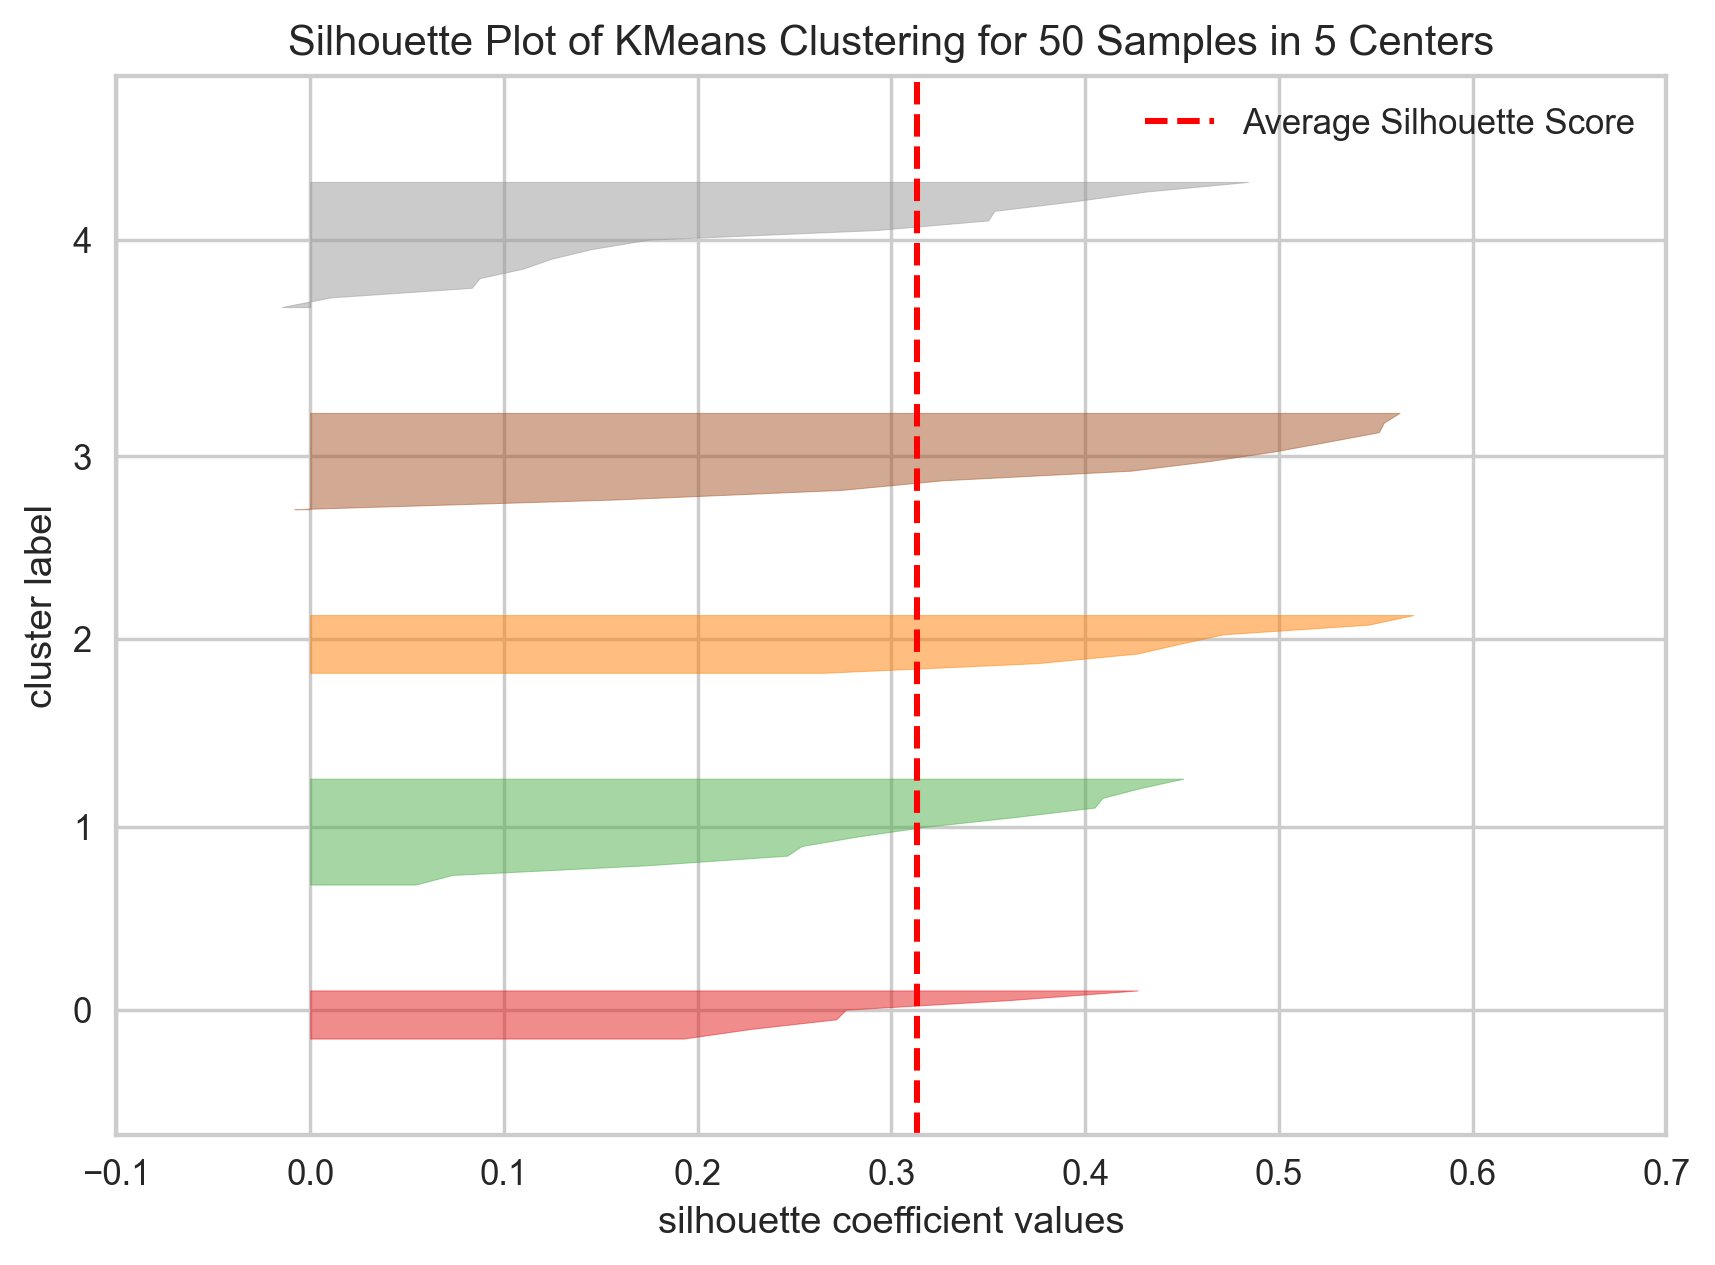

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [51]:
model = SilhouetteVisualizer(KMeans(n_clusters=5))
vis = model.fit(x)
vis.show()

In [52]:
sil_score=[]


for i in range(2,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

In [53]:
sil_score

[0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544,
 0.012929499871726544]

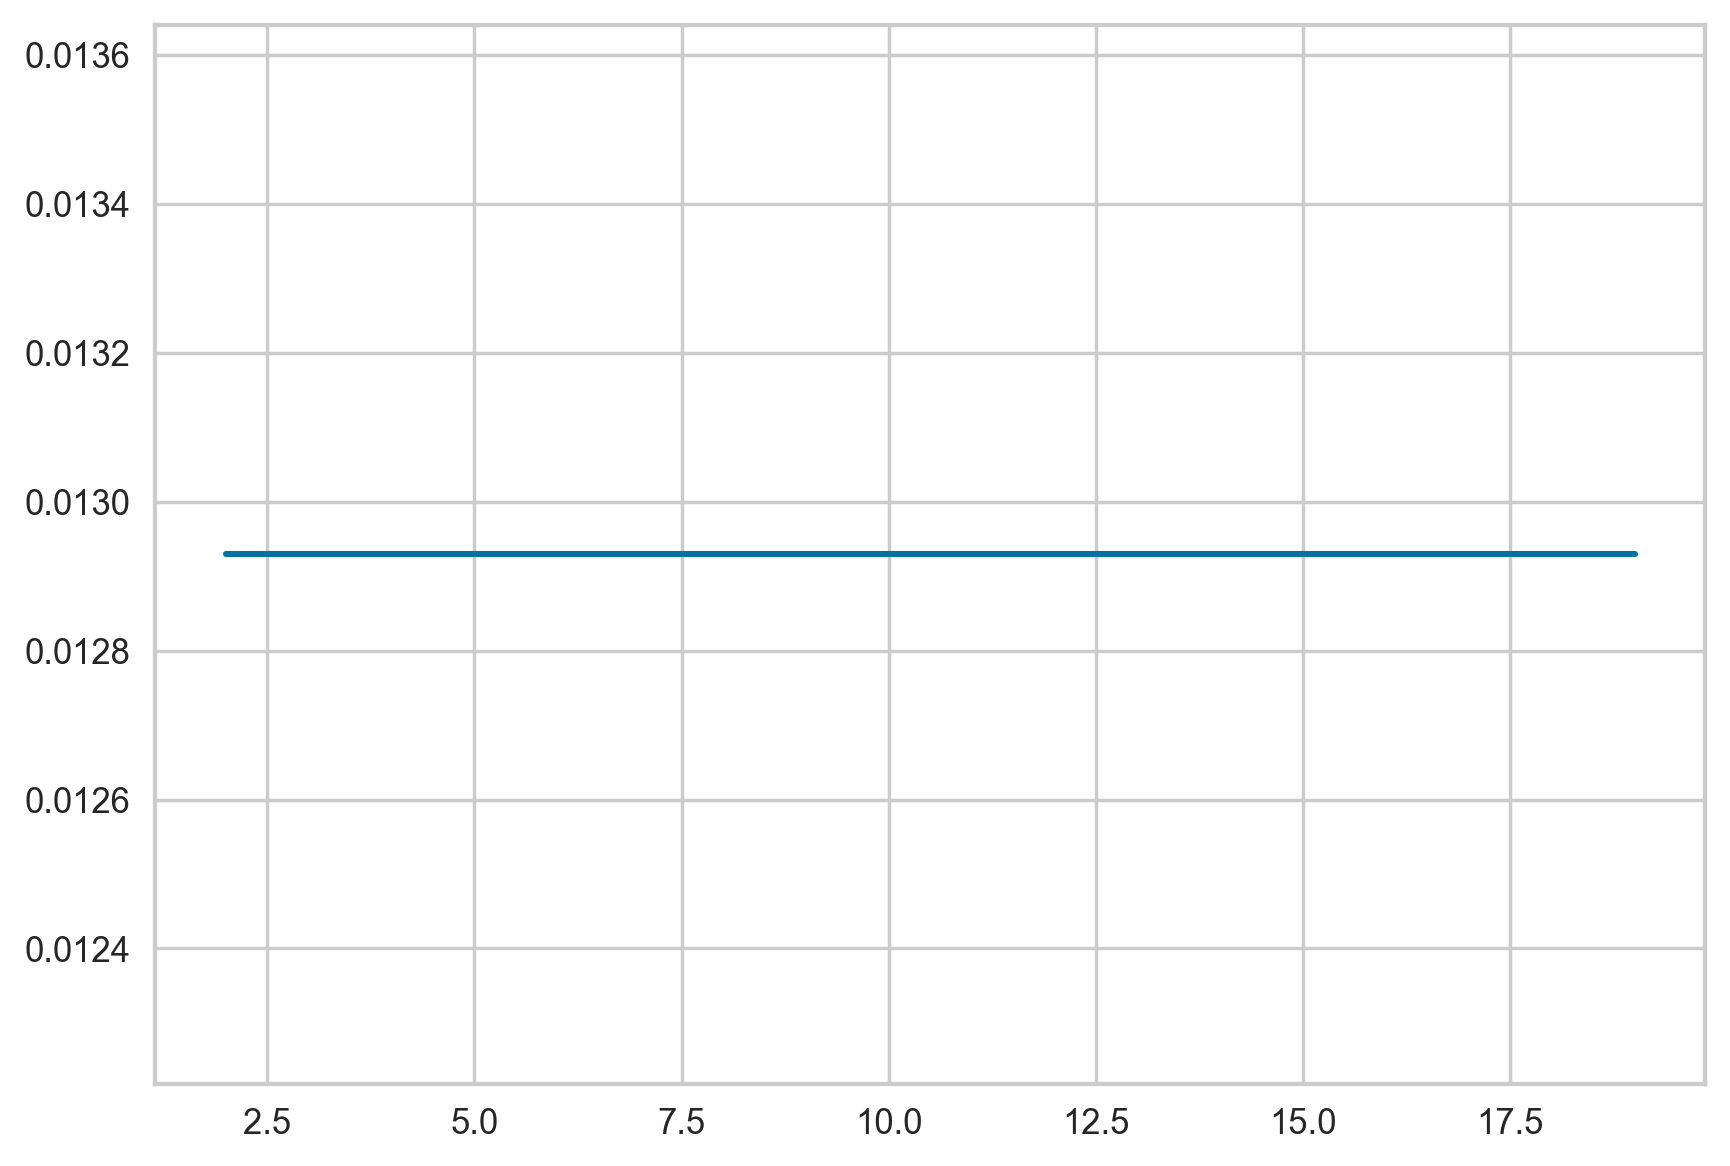

In [54]:
plt.plot(range(2,20),sil_score)

# DBSCAN

In [ ]:
# inference
DBSCan is used to detect outlier in cluster.

In [103]:
data=pd.read_csv('crime_data.csv',index_col=0)

In [104]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


<AxesSubplot:>

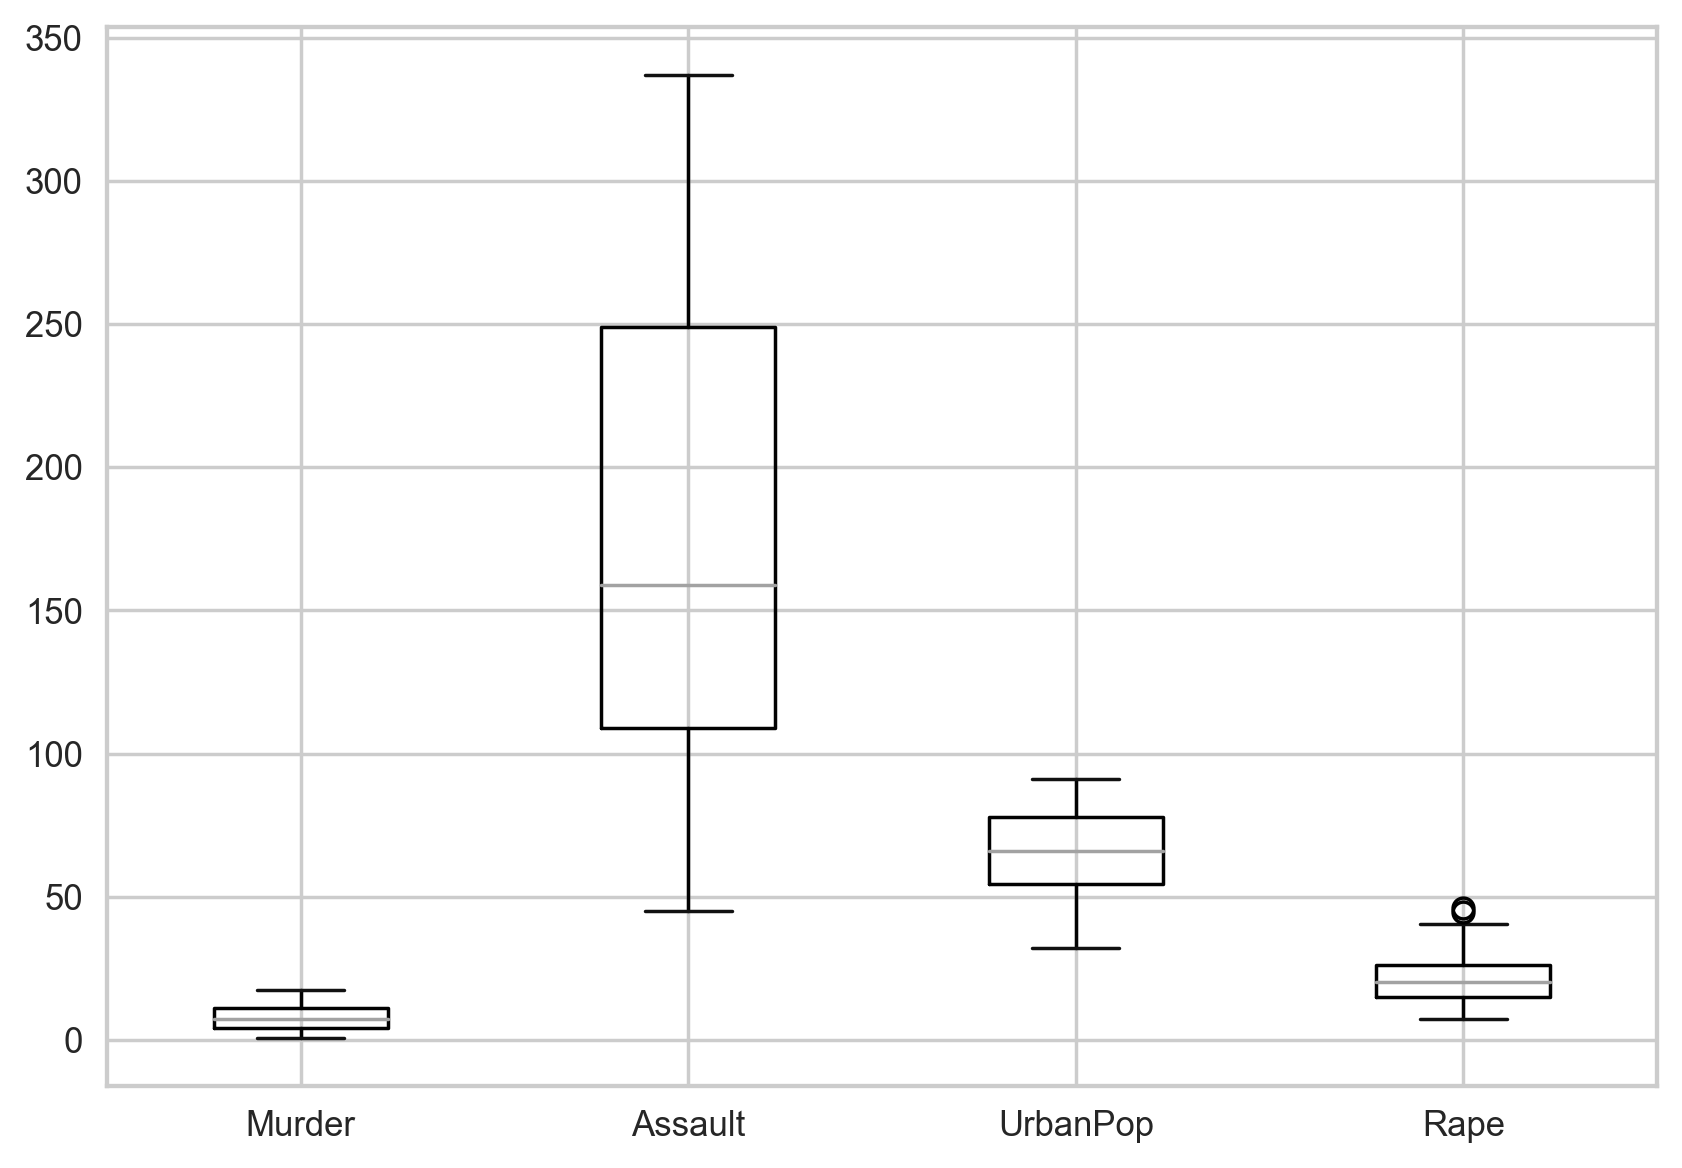

In [105]:
data.boxplot()

In [123]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [59]:
from sklearn.cluster import DBSCAN

In [60]:
db = DBSCAN()


In [127]:
y2 = db.fit_predict(data)
y2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

## Hyperparameter Tuning

In [62]:
## finiding out the best eps value (k-dist plot)

In [63]:
from sklearn.neighbors import NearestNeighbors

In [64]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [65]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.780062,0.849285
1,0.0,2.078984,2.136971
2,0.0,1.048220,1.083411
3,0.0,1.001328,1.007227
4,0.0,1.208977,1.300691
5,0.0,1.248863,1.300691
6,0.0,0.881004,0.956432
7,0.0,1.192276,1.271401
8,0.0,1.309743,1.349263
9,0.0,0.867978,1.022502


In [128]:
dist = np.sort(d[:,1],axis=0)
dist

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

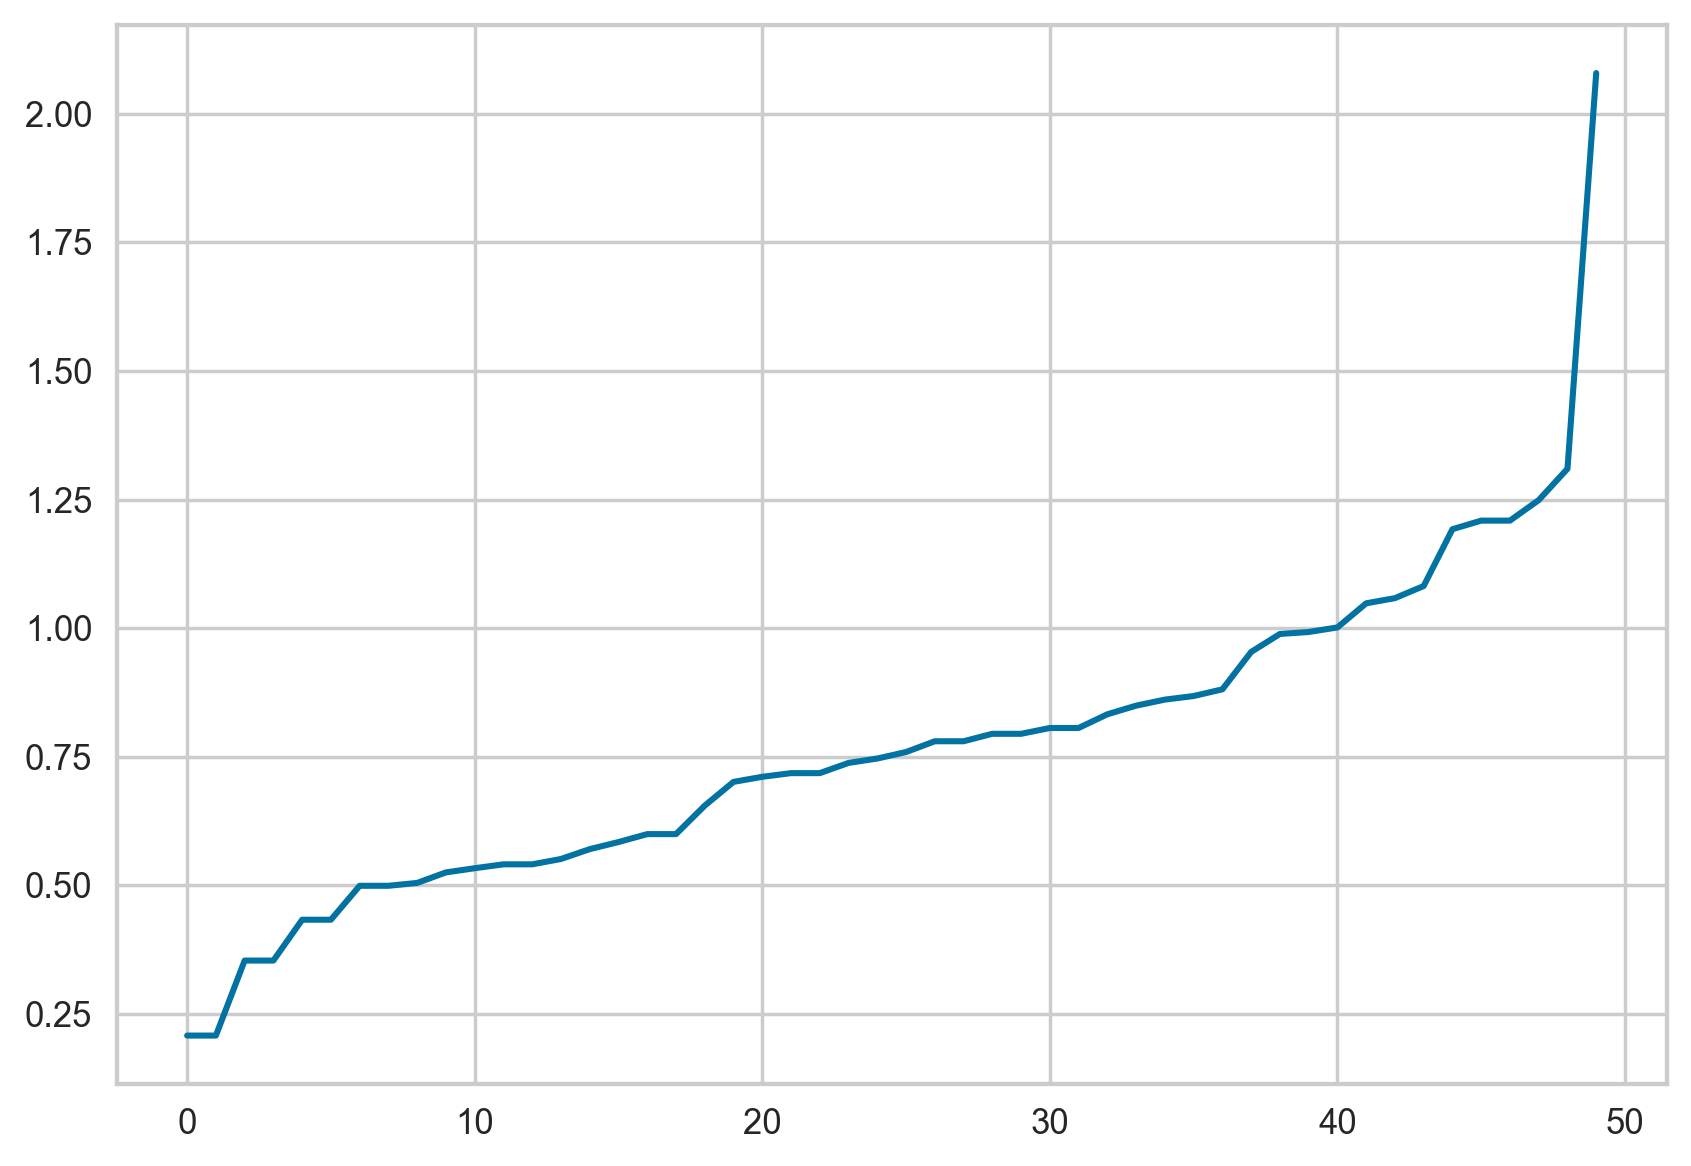

In [129]:
plt.plot(dist)

In [130]:
db = DBSCAN(eps=2,min_samples=3)
ypred = db.fit_predict(x)
ypred

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [69]:
silhouette_score(x,ypred)

0.23455598753159795

In [140]:
data['cluster']=ypred

In [141]:
data[data['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,-1


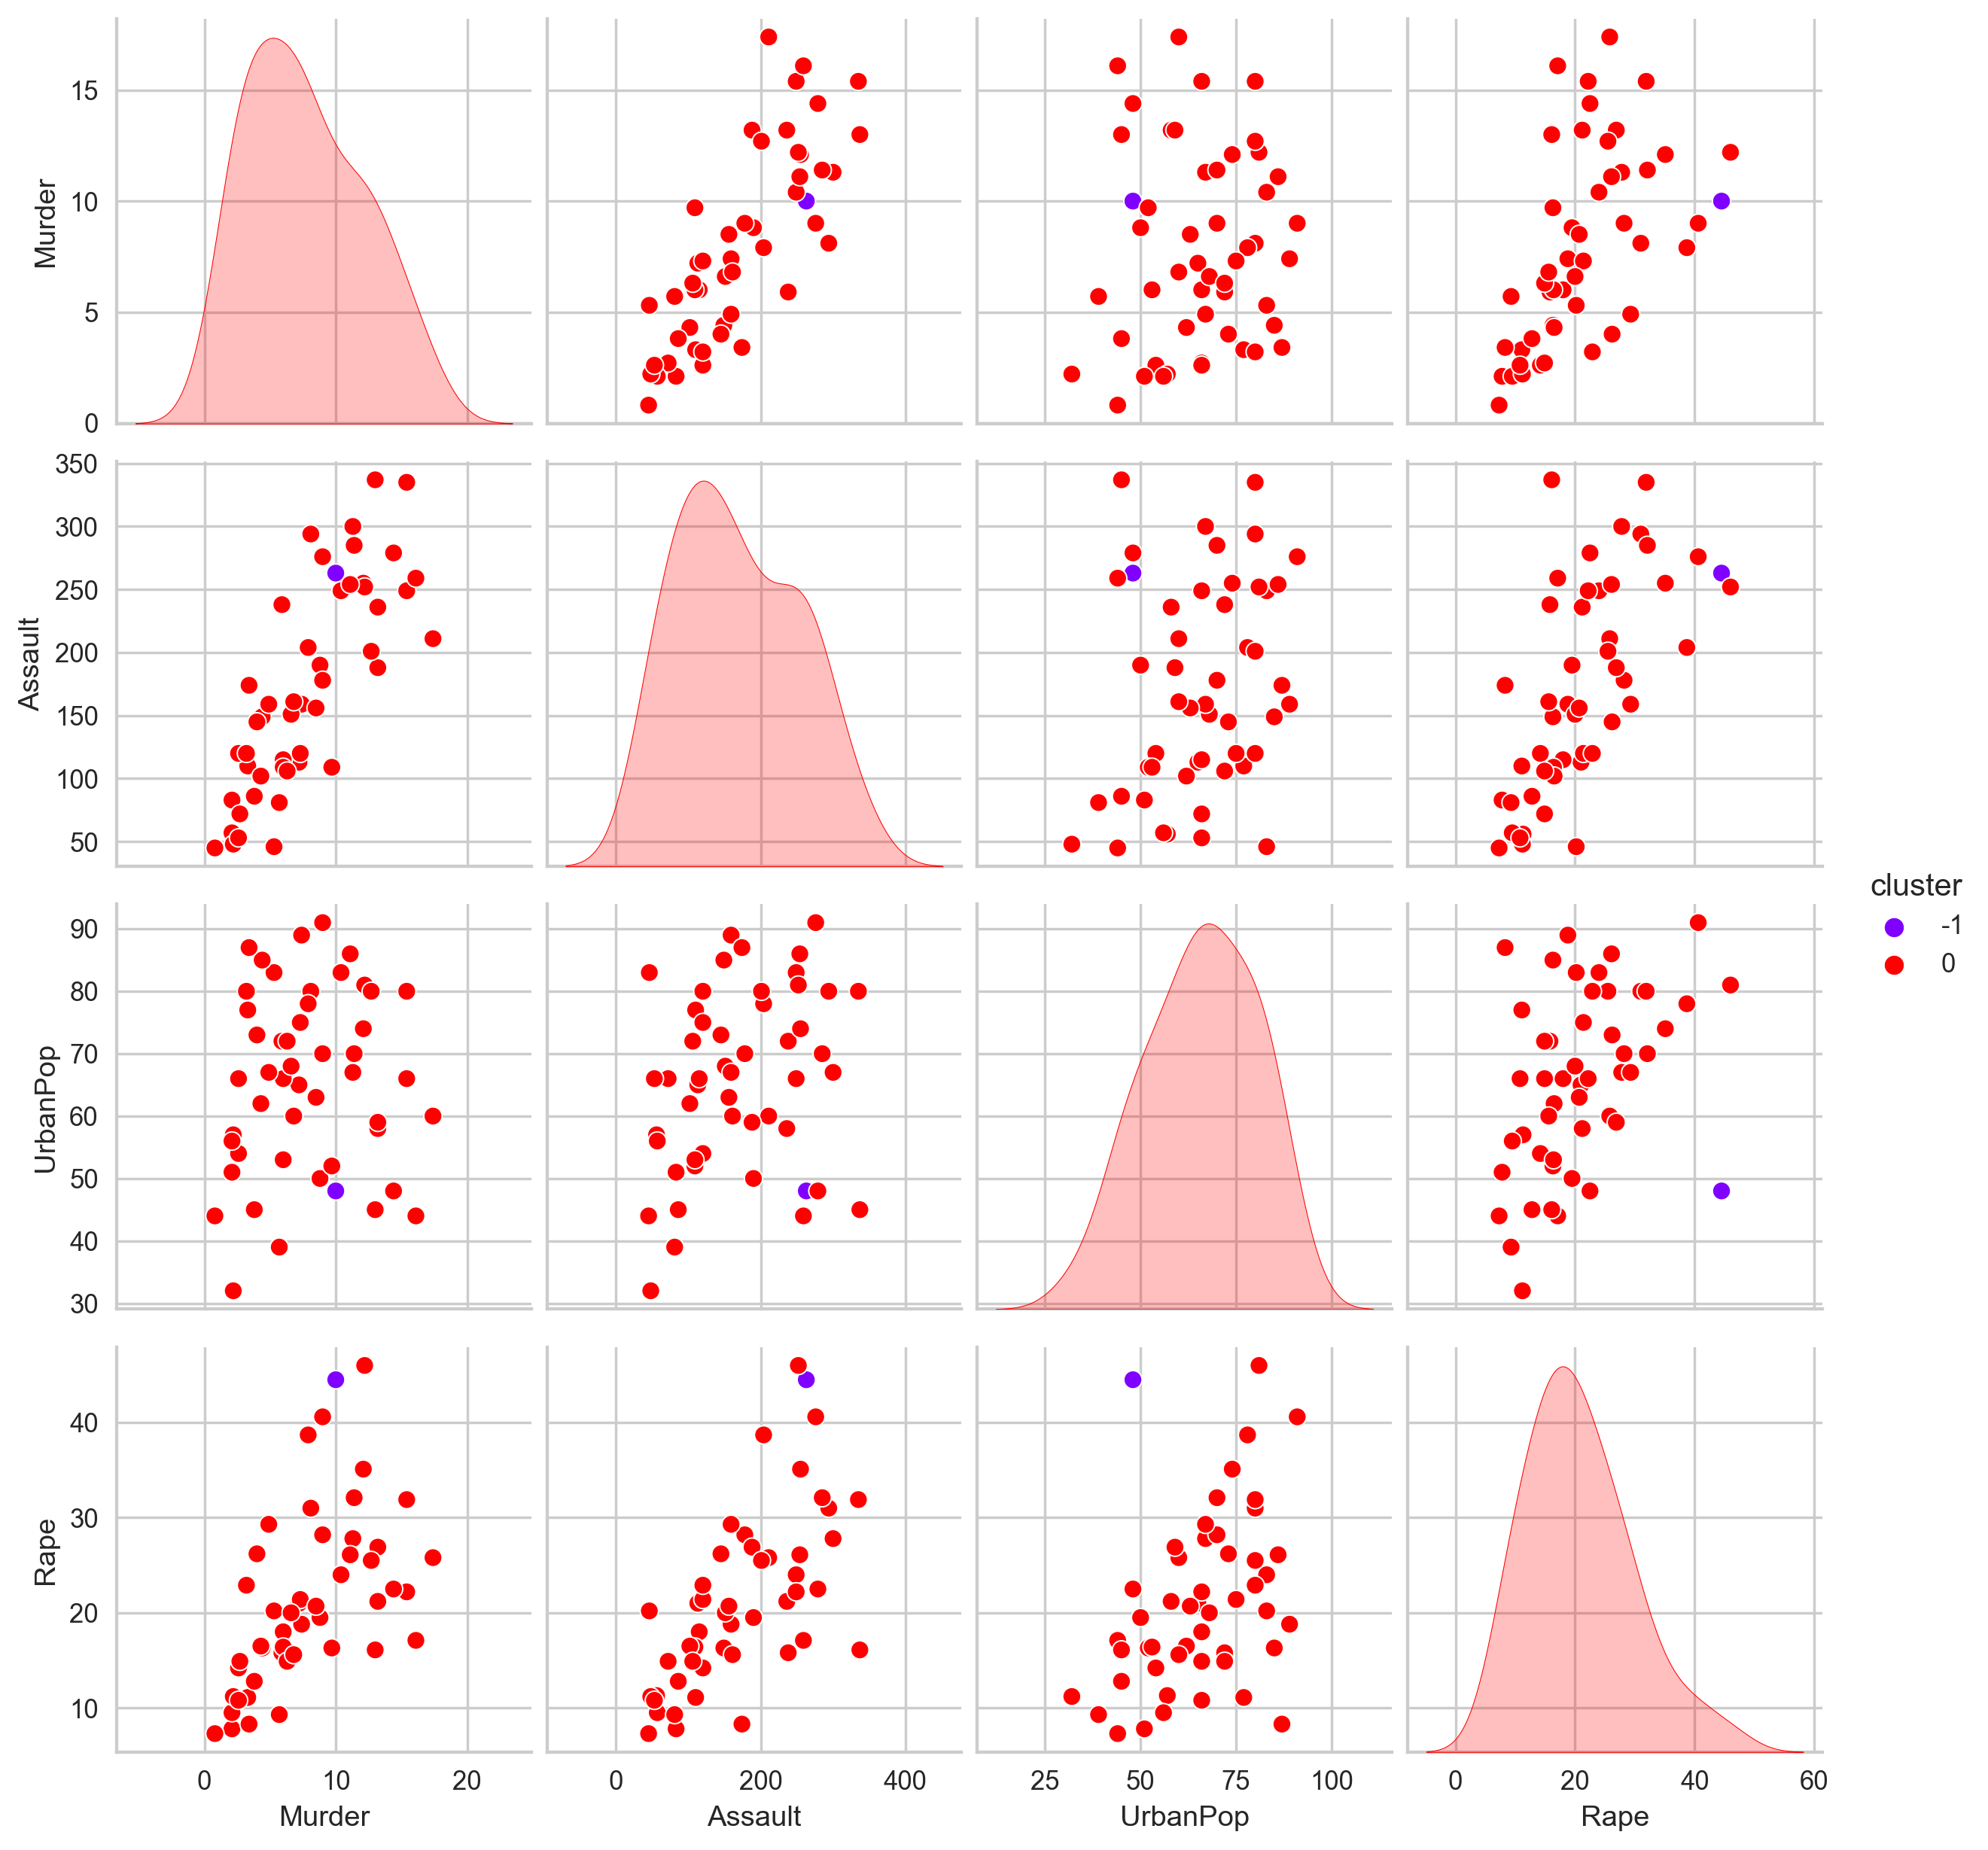

In [142]:
sns.pairplot(data,hue= 'cluster' ,palette = 'rainbow')

In [ ]:
# from DBSCAN we conclude that there is presence of outlier.